<a href="https://colab.research.google.com/github/shxxdyna/Detecting-Online-Recruitment-Fraud-ML/blob/main/ML_Online_Recruitment_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import io
from sklearn.preprocessing import LabelEncoder

import re
import nltk
import statistics
import matplotlib.pyplot as plt


from nltk.corpus import stopwords
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DataSet.csv to DataSet.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['DataSet.csv']))

#Exploratory Data Analysis (EDA)

>Understanding the dataset

>Forming possible hypothesis





tambah ni # Plotting bivariate relations between each pair of features (4 features x4 so 16 graphs) with hue = "diagnosis"
sns.pairplot(data, hue="diagnosis", vars = ["radius_mean", "concavity_mean", "smoothness_mean", "texture_mean"])
plt.show()

In [ ]:
df.head(10)

#get the first 10 rows of the dataset

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
5,Accounting Clerk,"US, MD,",NaN,NaN,NaN,<p><b>Job Overview</b></p>\r\n<p>Apex is an en...,NaN,NaN,f,f,f,NaN,NaN,NaN,NaN,NaN,f,f
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"<p>Founded in 2009, the <b>Fonpit AG</b> rose ...",<p><b>Your Responsibilities:</b></p>\r\n<p> </...,<p><b>Your Know-How:</b></p>\r\n<p><b> ...,<p><b>Your Benefits:</b></p>\r\n<p> </p>\r\n<u...,f,t,t,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,f,f
7,Lead Guest Service Specialist,"US, CA, San Francisco",NaN,NaN,<p>Airenvy’s mission is to provide lucrative y...,<h3>Who is Airenvy?</h3>\r\n<p>Hey there! We a...,"<ul>\r\n<li>Experience with CRM software, live...",<p><b>Competitive Pay.</b> You'll be able to e...,f,t,t,NaN,NaN,NaN,NaN,NaN,f,f
8,HP BSM SME,"US, FL, Pensacola",NaN,NaN,<p>Solutions3 is a <b>woman-owned small busine...,<p></p>\r\n<p></p>\r\n<p>Implementation/Config...,<p><b>MUST BE A US CITIZEN.</b></p>\r\n<p><b>A...,NaN,f,t,t,Full-time,Associate,NaN,Information Technology and Services,NaN,f,f
9,Customer Service Associate - Part Time,"US, AZ, Phoenix",NaN,NaN,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>The Customer Service Associate will be base...,<p><b>Minimum Requirements:</b></p>\r\n<ul>\r\...,NaN,f,t,f,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,f,f


## Multivariate Analysis EDA

## Univariate Analysis EDA

In [ ]:
df.columns

#find column names of the dataset

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'in_balanced_dataset'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

##Types of Data in the Dataset

**Text Data**

* *String* - title, location, department, salary_range

* *HTML Fragments* - company_profile, description, requirements, benefits

**Binary Data**

* telecommuting , has_company_logo, has_questions, fraudulent, in_balanced

**Nominal Data**
* employment_type, required_experience, required_education, industry, function



#### Text Data

Identifying Unique Values in the Text Data

In [ ]:
df.title.nunique()


11231

In [ ]:
df.department.nunique()


1337

In [ ]:
df.location.nunique()


3105

In [ ]:
df.location.value_counts().sum()


17534

In [ ]:
df.salary_range.nunique()


874

In [ ]:
df.description.nunique()


15095

In [ ]:
df.salary_range.value_counts().sum()


2868

#### Nominal Data


In [ ]:
count = df.required_education.value_counts()
num_unique_values = df['required_education'].nunique()
print("Number of unique values in 'required_education':", num_unique_values)
print("Total counts across all unique values in 'required_education':", count)


Number of unique values in 'required_education': 13
Total counts across all unique values in 'required_education': Bachelor's Degree                    5145
High School or equivalent            2080
Unspecified                          1397
Master's Degree                       416
Associate Degree                      274
Certification                         170
Some College Coursework Completed     102
Professional                           74
Vocational                             49
Some High School Coursework            27
Doctorate                              26
Vocational - HS Diploma                 9
Vocational - Degree                     6
Name: required_education, dtype: int64


In [ ]:
df.employment_type.value_counts()


Full-time    11620
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [ ]:
count = df.required_experience.value_counts()
print(count)

Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64


In [ ]:
print("Number of unique values in 'industry':", df['industry'].nunique())

df.industry.value_counts()

#reannotate the column

Number of unique values in 'industry': 131


Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
                                       ... 
Shipbuilding                              1
Sporting Goods                            1
Museums and Institutions                  1
Wine and Spirits                          1
Ranching                                  1
Name: industry, Length: 131, dtype: int64

In [ ]:
print("Number of unique values in 'function':", df['function'].nunique())

df.function.value_counts()

Number of unique values in 'function': 37


Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

#### Binary Data

In [ ]:
df.telecommuting.value_counts()


f    17113
t      767
Name: telecommuting, dtype: int64

In [ ]:
df.has_company_logo.value_counts()


t    14220
f     3660
Name: has_company_logo, dtype: int64

In [ ]:
df.has_questions.value_counts()


f    9088
t    8792
Name: has_questions, dtype: int64

In [ ]:
df.fraudulent.value_counts()


f    17014
t      866
Name: fraudulent, dtype: int64

## Graphs of Univariate Analysis

<ipython-input-31-1e8fb8e1f525>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.values, y=education_counts.index, palette='Blues')


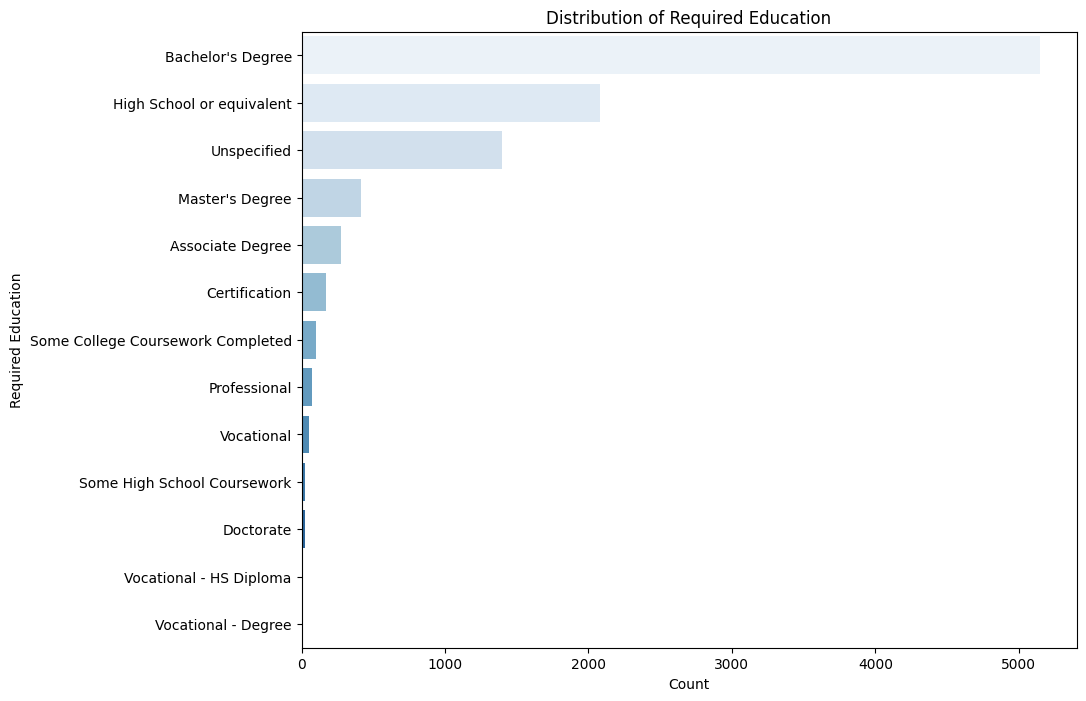

In [ ]:
# Count occurrences of each category
education_counts = df['required_education'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=education_counts.values, y=education_counts.index, palette='Blues')
plt.title('Distribution of Required Education')
plt.xlabel('Count')
plt.ylabel('Required Education')
plt.show()


<ipython-input-29-5afd7ad4f761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=function_counts.values, y=function_counts.index, palette='Blues')


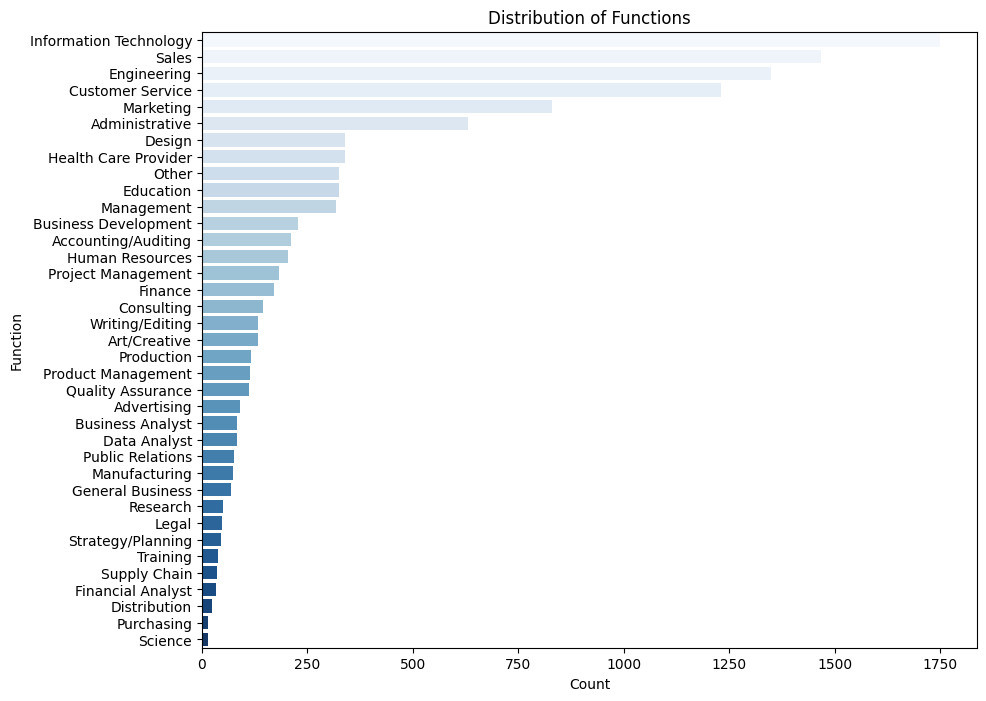

In [ ]:
# Count occurrences of each category
function_counts = df['function'].value_counts()

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=function_counts.values, y=function_counts.index, palette='Blues')
plt.title('Distribution of Functions')
plt.xlabel('Count')
plt.ylabel('Function')
plt.show()

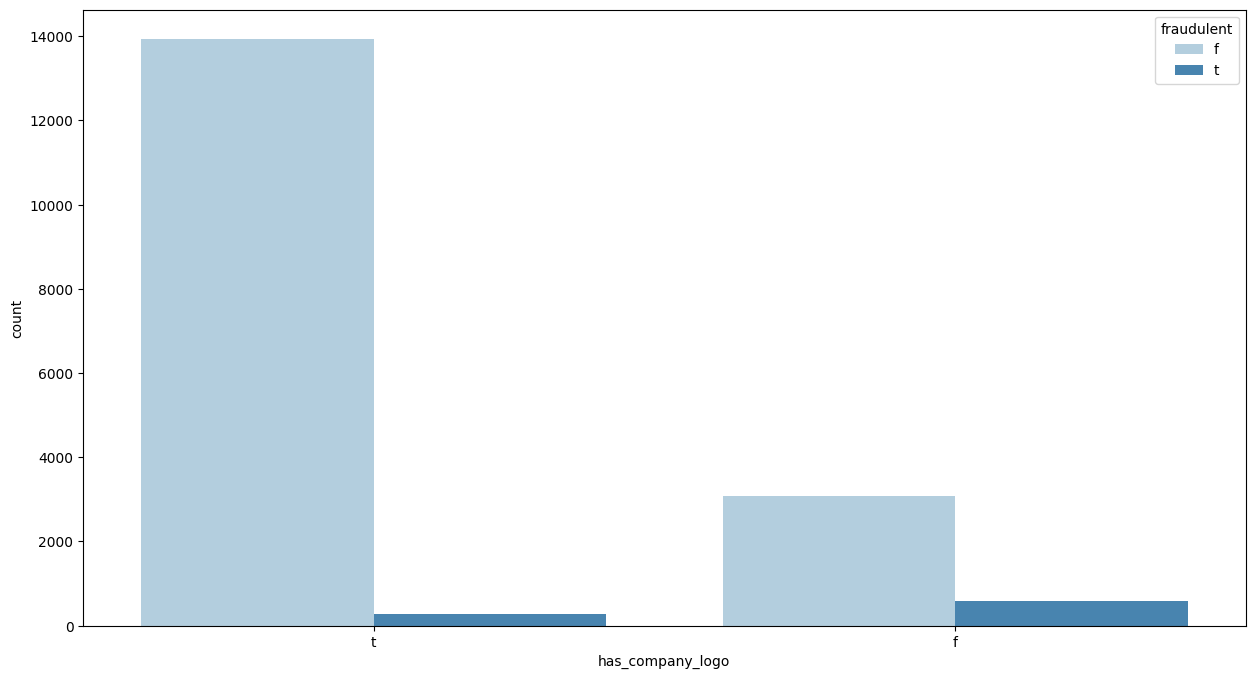

In [ ]:
chart=df[['has_company_logo','fraudulent']]
plt.figure(figsize=(15,8))
sns.countplot(palette='Blues',hue='fraudulent',x='has_company_logo',data=chart)
plt.show();

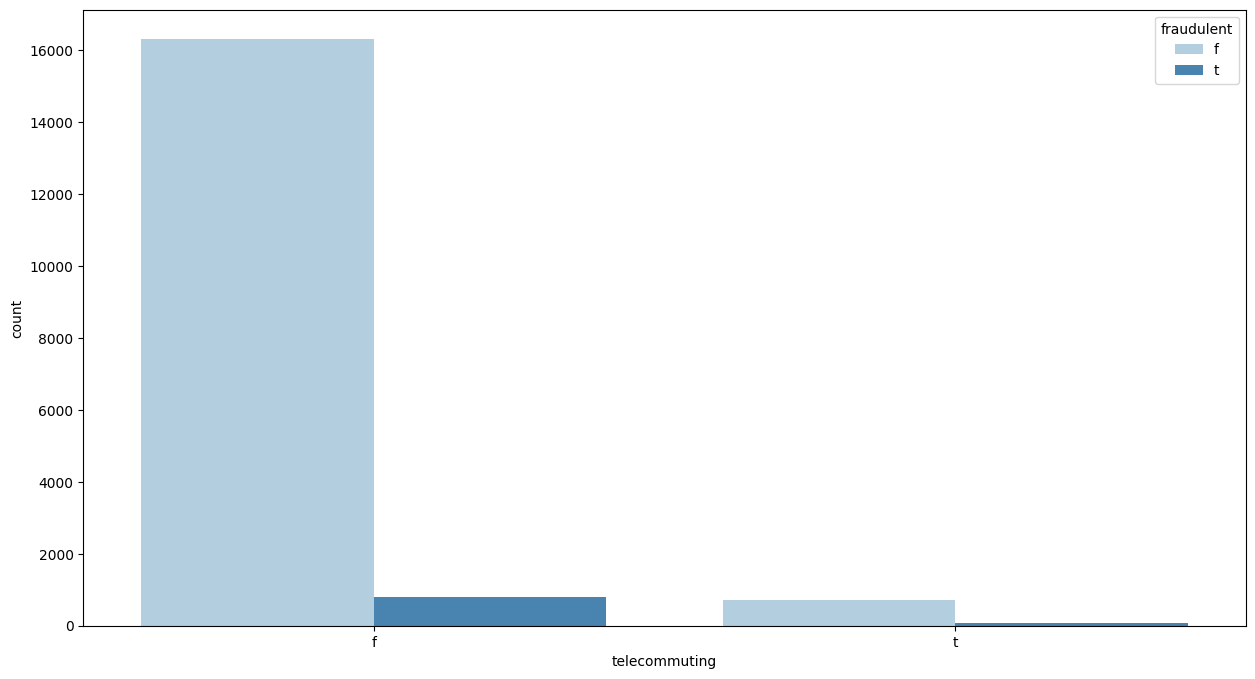

In [ ]:
chart=df[['telecommuting','fraudulent']]
plt.figure(figsize=(15,8))
sns.countplot(palette='Blues',hue='fraudulent',x='telecommuting',data=chart)
plt.show();

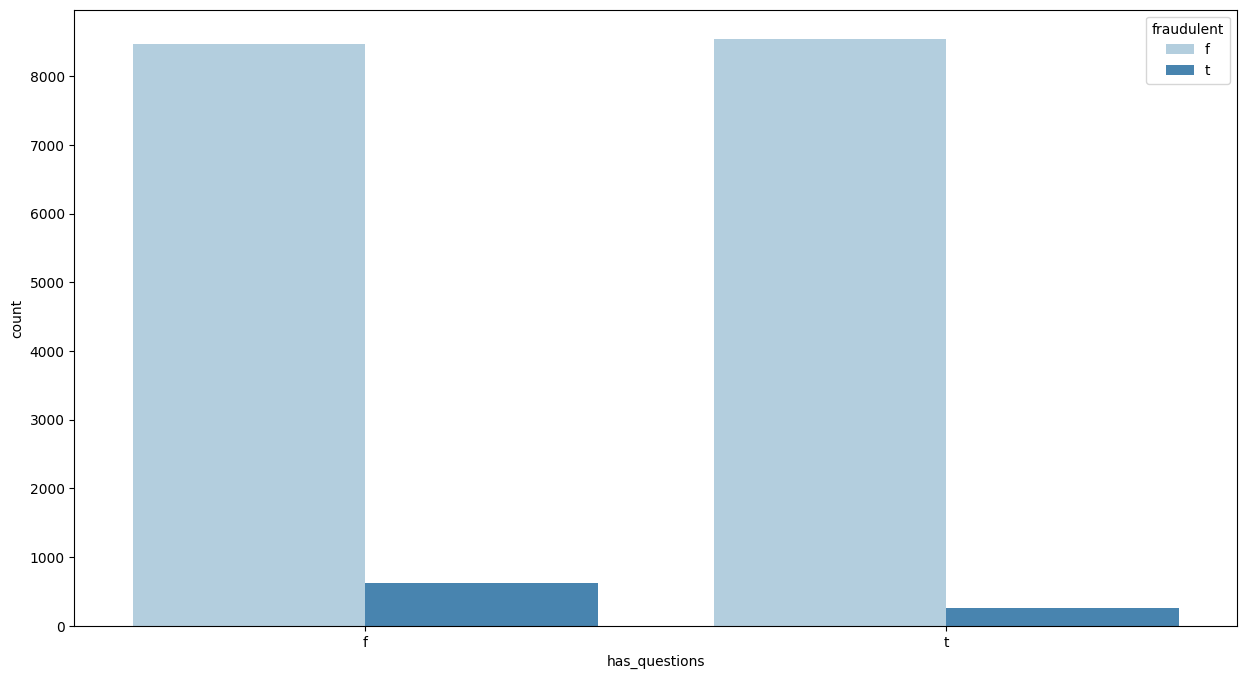

In [ ]:
chart=df[['has_questions','fraudulent']]
plt.figure(figsize=(15,8))
sns.countplot(palette='Blues',hue='fraudulent',x='has_questions',data=chart)
plt.show();

<Figure size 1200x800 with 0 Axes>

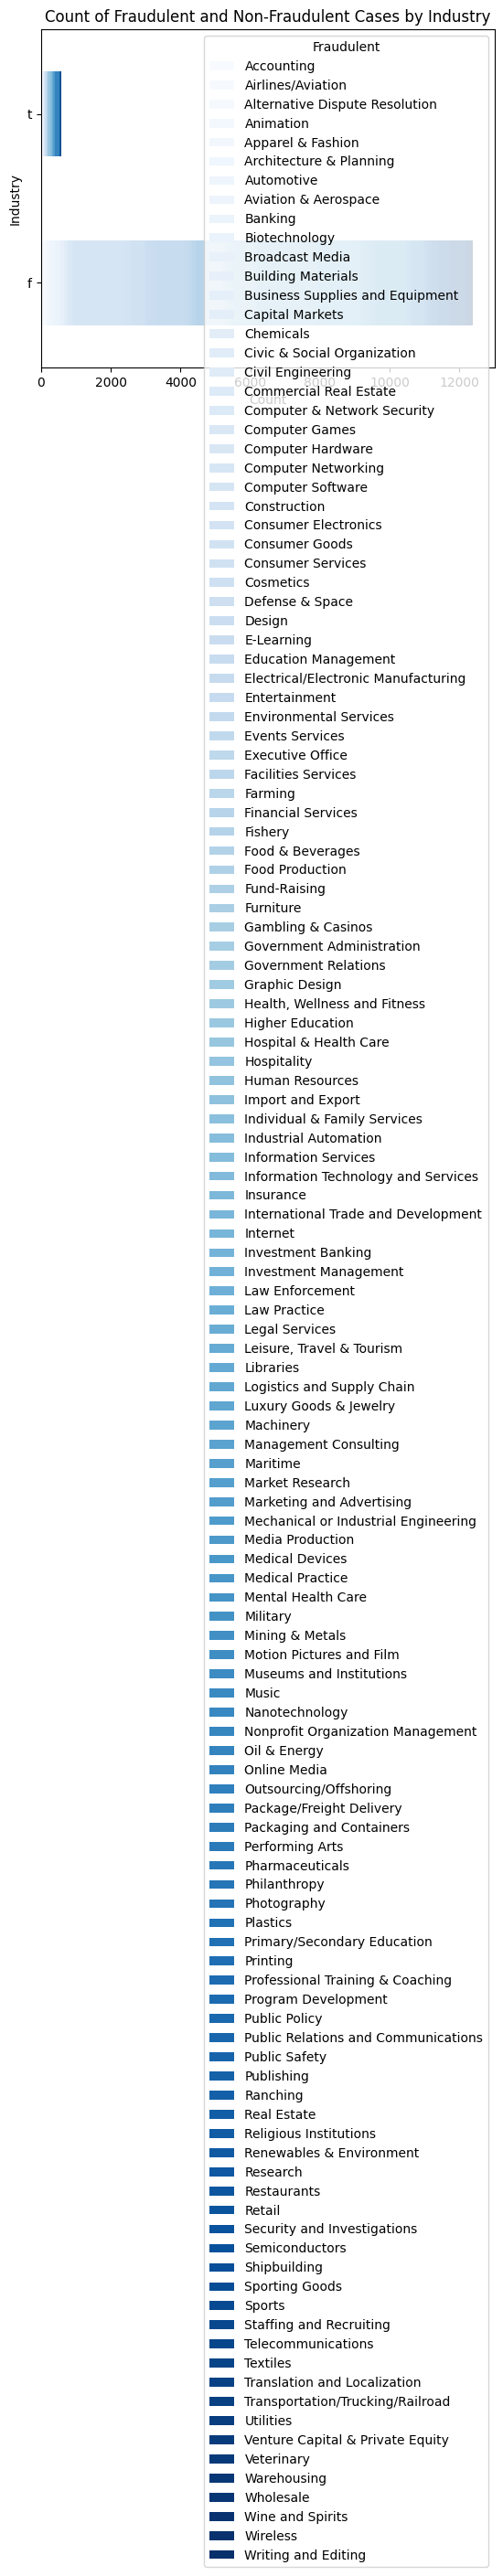

In [ ]:
chart = df[['function', 'fraudulent']]

plt.figure(figsize=(15, 10))
sns.countplot(palette='Blues', hue='fraudulent', x='function', data=chart, dodge=0.2)
# Adjust the value of 'dodge' as needed

plt.show()

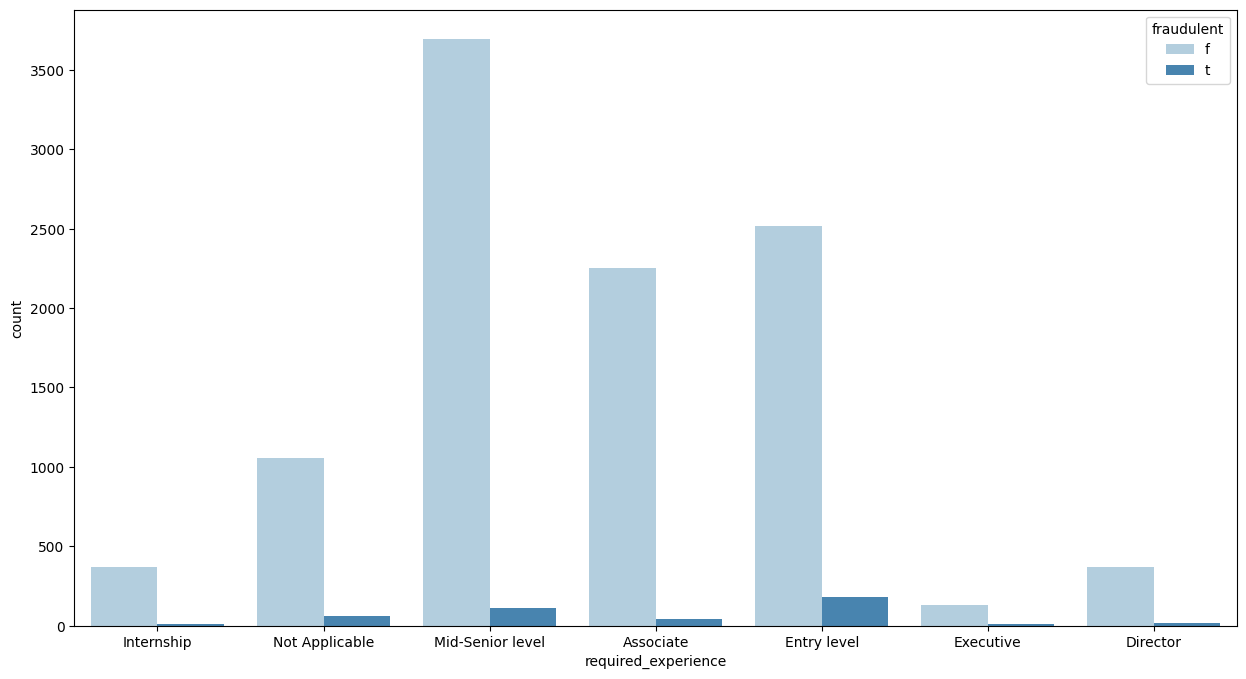

In [ ]:
chart=df[['required_experience','fraudulent']]
plt.figure(figsize=(15,8))
sns.countplot(palette='Blues',hue='fraudulent',x='required_experience',data=chart)
plt.show();

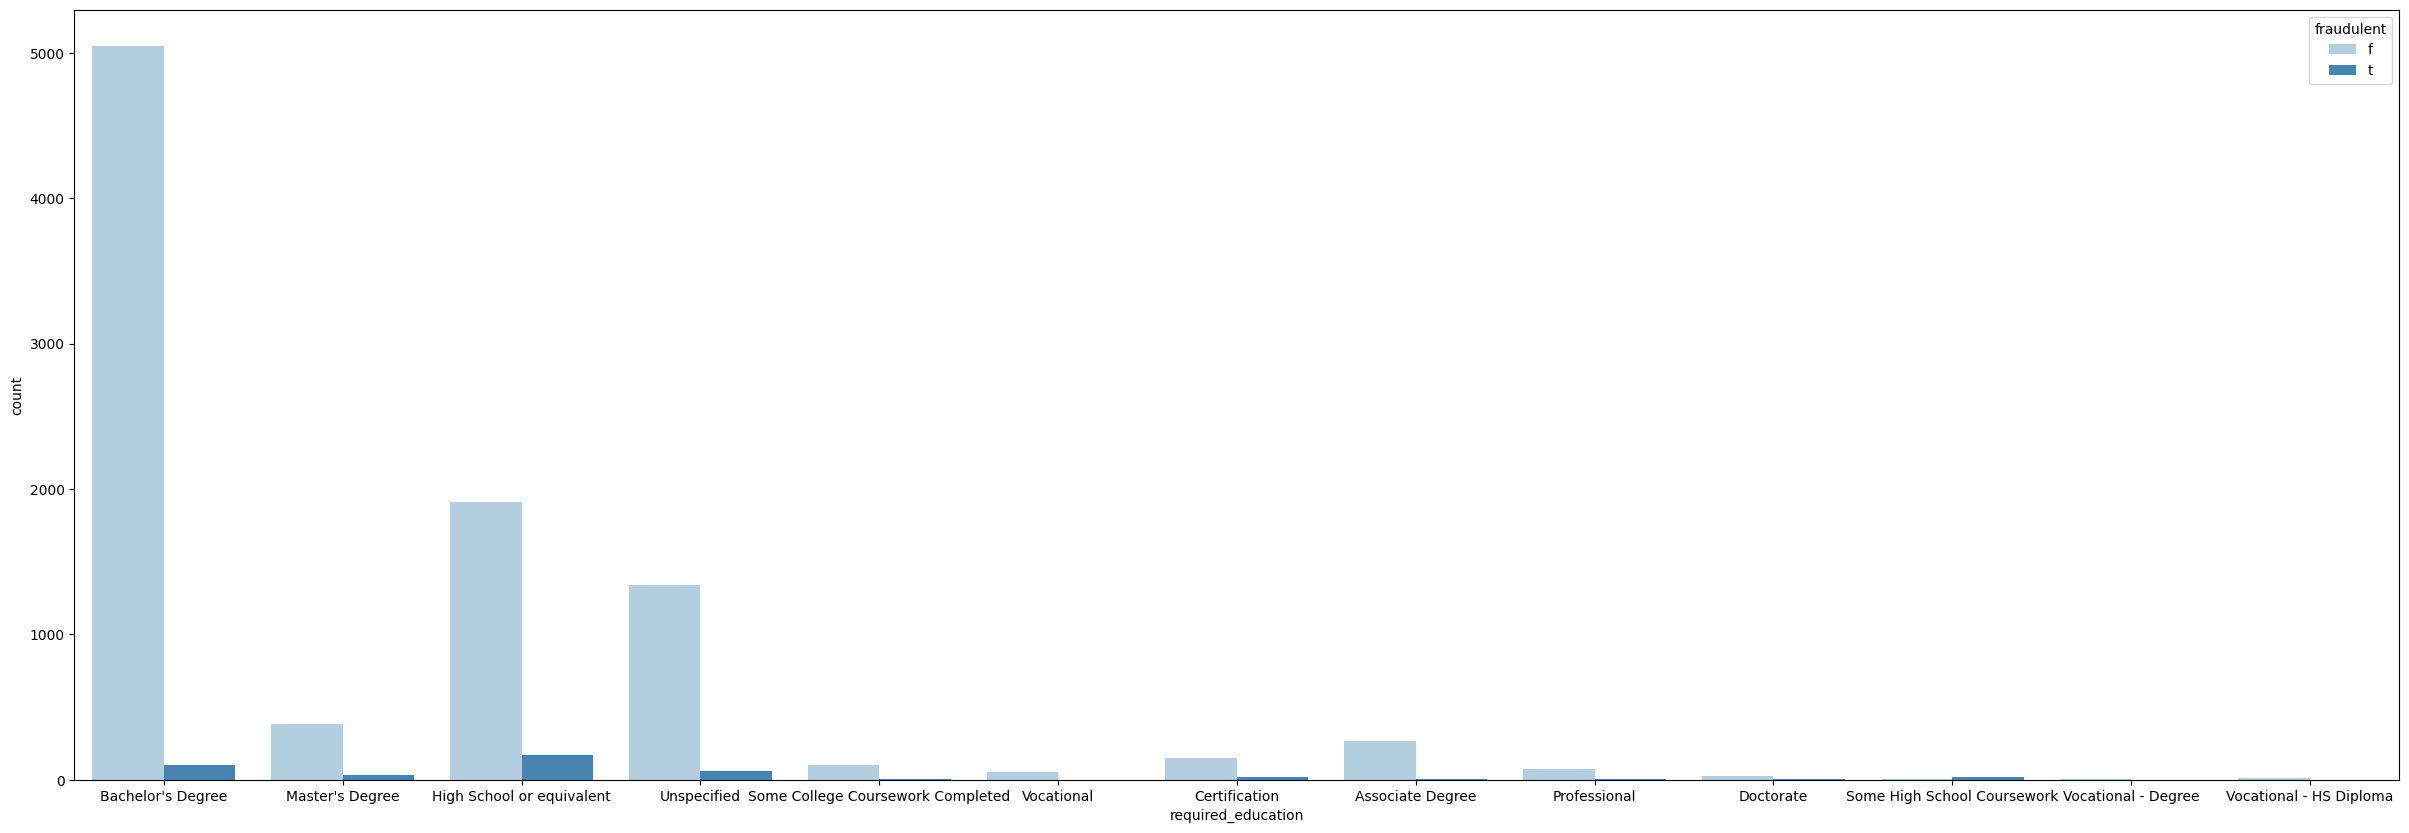

In [ ]:
chart=df[['required_education','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Blues',hue='fraudulent',x='required_education',data=chart)
plt.show();

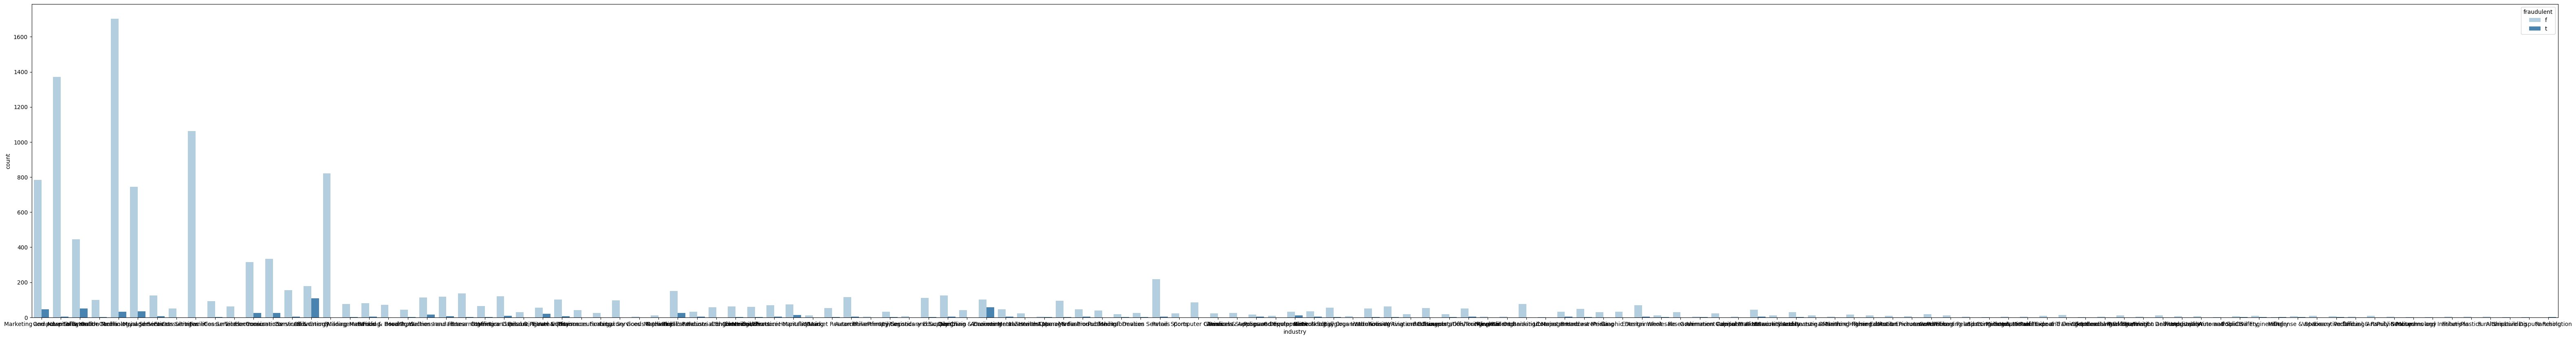

0
fraudulent industry                           
f          Alternative Dispute Resolution    1
           Military                          1
           Museums and Institutions          1
           Shipbuilding                      1
           Sporting Goods                    1
...                                        ...
t          Financial Services               35
           Marketing and Advertising        45
           Hospital & Health Care           51
           Accounting                       57
           Oil & Energy                    109

[192 rows x 1 columns]

In [ ]:
chart=df[['industry','fraudulent']]
plt.figure(figsize=(80,10))
sns.countplot(palette='Blues',hue='fraudulent',x='industry',data=chart)
plt.show();
df.groupby(['fraudulent','industry']).size().to_frame().sort_values(by=['fraudulent', 0 ])


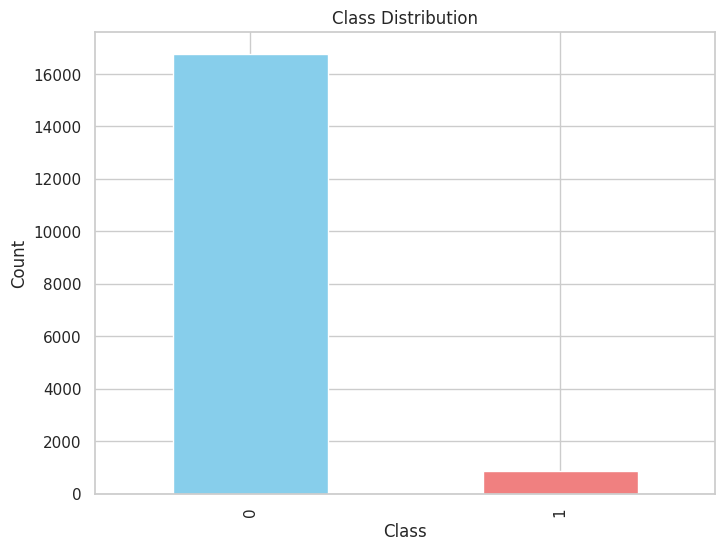

0    16770
1      856
Name: fraudulent, dtype: int64
0.04843400447427293


TypeError: unsupported operand type(s) for ** or pow(): 'NoneType' and 'int'

In [ ]:
# Calculate class counts
class_counts = df['fraudulent'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
print(class_counts)
print(866/(17014+866))**100

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


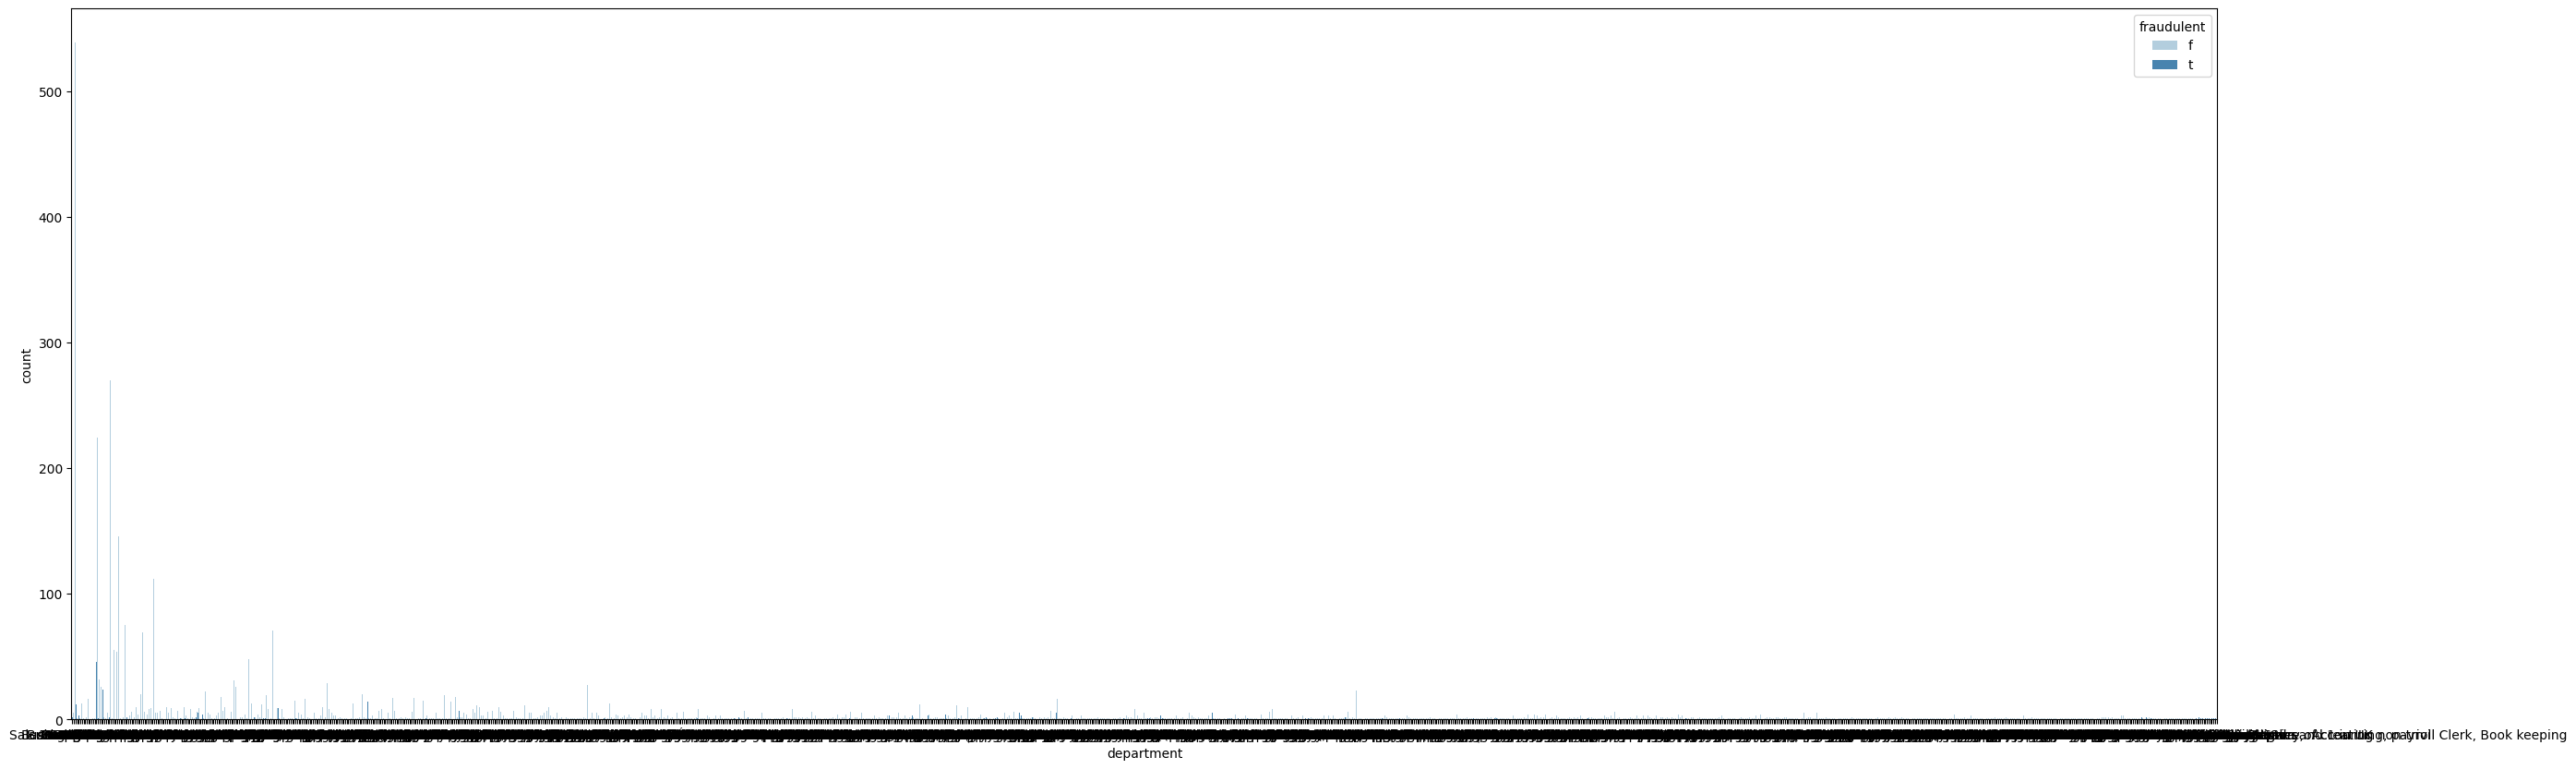

In [ ]:
chart=df[['department','fraudulent']]
plt.figure(figsize=(30,10))
sns.countplot(palette='Blues',hue='fraudulent',x='department',data=chart)
plt.show();

In [ ]:
df.shape

(17880, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17880 non-null  object
 6   requirements         15191 non-null  object
 7   benefits             10684 non-null  object
 8   telecommuting        17880 non-null  object
 9   has_company_logo     17880 non-null  object
 10  has_questions        17880 non-null  object
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [ ]:
df.groupby(['fraudulent','has_questions']).size()



fraudulent  has_questions
f           f                8472
            t                8542
t           f                 616
            t                 250
dtype: int64

In [ ]:
word_length = df[['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'required_education', 'employment_type', 'required_experience', 'industry', 'function']].fillna('').astype(str).apply(lambda x:x.str.len())
word_length.iloc[df[df["fraudulent"] == "t"].index].mean() # Fake Average

title                    30.666282
location                 14.872979
department                5.058891
company_profile         305.646651
description            1436.403002
requirements            512.369515
benefits                255.424942
required_education        9.382217
employment_type           6.375289
required_experience       6.144342
industry                 12.158199
function                  7.904157
dtype: float64

In [ ]:
word_length.iloc[df[df["fraudulent"] == "f"].index].mean() # Real Average


title                    28.421594
location                 15.336311
department                3.679793
company_profile         713.554720
description            1438.673387
requirements            742.537557
benefits                268.438933
required_education        9.731339
employment_type           7.154579
required_experience       7.627718
industry                 14.057952
function                  8.367991
dtype: float64

#Cleaning the Dataset



### Dropping unnecessary columns

In [ ]:
df.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [ ]:
#Since in_balanced_dataset won't be helping or improving our model and since more than 80% of 'salary_range' is missing, we'll be dropping
#these two columns.

# make sure to find proof on the 80% of salary range is missing

df.drop('salary_range',axis=1,inplace=True)
df.drop('in_balanced_dataset',axis=1,inplace=True)

In [ ]:
#see if missing values is replaced
df.head(1)

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f


In [ ]:
#Filling the empty cells with 'Missing'
columns=['location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']
for i in columns:
    df[i]=df[i].fillna(value='Missing')

In [ ]:
df.isnull().sum()

title                  0
location               0
department             0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

### Removing Duplicates from the Data

In [ ]:
duplicates = df[df.duplicated(keep=False)]


In [ ]:
duplicates

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
45,Inside Sales Professional-Omaha,"US, NE, Omaha",Missing,"<p>ABC Supply Co., Inc. is the nation’s larges...","<p>As a Sales Representative, you will provide...","<p>As a Sales Representative, you must have th...",<p><br>Your benefits package as a Sales Repres...,f,t,f,Full-time,Missing,Missing,Building Materials,Sales,f
62,English Teacher Abroad,"US, CA, Sacramento",Missing,<p>We help teachers get safe &amp; secure jobs...,"<p>Play with kids, get paid for it </p>\r\n<p>...",<p>University degree required. TEFL / TESOL / ...,<p>See job description</p>,f,t,t,Contract,Missing,Bachelor's Degree,Education Management,Missing,f
83,Mail Processing Associate - General Clerk 1,"US, KY, London",Missing,"<p>Novitex Enterprise Solutions, formerly Pitn...",<p>We are currently seeking a General Clerk I....,<p><b>Required Qualifications:</b></p>\r\n<ul>...,Missing,f,t,f,Full-time,Entry level,High School or equivalent,Consumer Services,Customer Service,f
85,Research Associate,"US, CA, Newport Beach",Missing,<p>Green Street Advisors is the industry leade...,<p>Green Street Advisors is the preeminent ind...,<p>In addition to a strongwork ethic and motiv...,<p>Green Street Advisors is the preeminent ind...,f,t,t,Full-time,Associate,Bachelor's Degree,Financial Services,Financial Analyst,f
102,Marketing Administrator,"GB, WAR, Coventry",Marketplace,<p>Renewable Energy and Environmental Protecti...,<p>The job is to support the growth of the #UR...,<p>Computer literate</p>\r\n<p>Able to work wi...,<p>For a suitably motivated and success orient...,t,t,f,Full-time,Entry level,Bachelor's Degree,Internet,Marketing,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17591,Home Based Payroll Typist/Data Entry Clerks Po...,"US, MT, Absarokee",Clerical,Missing,<p>We have several openings available in this ...,"<p>Basic computer and typing skills, ability t...",<p>All you need is access to the Internet and ...,f,f,f,Missing,Missing,Missing,Missing,Missing,t
17612,Urgent Jobs (Part Time Workers Needed),"AU, NSW, Sydney",Missing,Missing,<p>Urgent Jobs (Part Time Workers Needed)<br>Y...,<p>No any experience required.</p>,Missing,f,f,f,Part-time,Missing,Missing,Missing,Missing,t
17620,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",Missing,Missing,<p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...,Missing,Missing,f,f,f,Missing,Missing,Missing,Missing,Missing,t
17742,Data Entry Admin/Clerical Positions - Work Fro...,"US, NE, Omaha",Missing,Missing,<p>ACCEPTING ONLINE APPLICATIONS ONLY</p>\r\n<...,Missing,Missing,f,f,f,Missing,Missing,Missing,Missing,Missing,t


In [ ]:
df = df.drop_duplicates()


In [ ]:
df.shape

(17626, 16)

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,Missing,f,t,f,Other,Internship,Missing,Missing,Marketing,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,Missing,f,t,f,Missing,Missing,Missing,Missing,Missing,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f
4,Bill Review Manager,"US, FL, Fort Worth",Missing,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f


### Cleaning Text Data

In [ ]:
# Remove html tags

df['company_profile'] = df.company_profile.str.replace(r'<[^>]*>', '')
df['description'] = df.description.str.replace(r'<[^>]*>', '')
df['requirements'] = df.requirements.str.replace(r'<[^>]*>', '')
df['benefits'] = df.requirements.str.replace(r'<[^>]*>', '')

<ipython-input-55-82261672a8ea>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['company_profile'] = df.company_profile.str.replace(r'<[^>]*>', '')
<ipython-input-55-82261672a8ea>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df.description.str.replace(r'<[^>]*>', '')
<ipython-input-55-82261672a8ea>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['requirements'] = df.requirements.str.replace(r'<[^>]*>', '')
<ipython-input-55-82261672a8ea>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['benefits'] = df.requirements.str.replace(r'<[^>]*>', '')


In [ ]:
# Remove non word characters and trailing white space in text-based columns

df['requirements'] = df['requirements'].str.replace(r'\W', ' ').str.replace(r'\s$','')
df['benefits'] = df['benefits'].str.replace(r'\W', ' ').str.replace(r'\s$','')
df['company_profile'] = df['company_profile'].str.replace(r'\W', ' ').str.replace(r'\s$','')
df['description'] = df['description'].str.replace(r'\W', ' ').str.replace(r'\s$','')



<ipython-input-56-3d04b018309b>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['requirements'] = df['requirements'].str.replace(r'\W', ' ').str.replace(r'\s$','')
<ipython-input-56-3d04b018309b>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['benefits'] = df['benefits'].str.replace(r'\W', ' ').str.replace(r'\s$','')
<ipython-input-56-3d04b018309b>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['company_profile'] = df['company_profile'].str.replace(r'\W', ' ').str.replace(r'\s$','')
<ipython-input-56-3d04b018309b>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['description'] = df['description'].str.replace(r'\W', ' ').str.replace(r'\s$','')


### Encoding binary data

In [ ]:
# Encode binary columns t as 1 and f as 0
# Encode binary columns t as 1 and f as 0
# Handling missing values (replace NaN with a default value, e.g., 'f')

# Mapping values
df['has_company_logo'] = df['has_company_logo'].map({'t': 1, 'f': 0})
df['telecommuting'] = df['telecommuting'].map({'t': 1, 'f': 0})
df['has_questions'] = df['has_questions'].map({'t': 1, 'f': 0})
df['fraudulent'] = df['fraudulent'].map({'t': 1, 'f': 0})

In [ ]:
df['has_company_logo'].head()


0    1
1    1
2    1
3    1
4    1
Name: has_company_logo, dtype: int64

In [ ]:
df['telecommuting'].head()

0    0
1    0
2    0
3    0
4    0
Name: telecommuting, dtype: int64

In [ ]:
df['has_questions'].head()

0    0
1    0
2    0
3    0
4    1
Name: has_questions, dtype: int64

In [ ]:
df['fraudulent'].head()

0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64




###Numerising Nominal Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17626 entries, 0 to 17879
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17626 non-null  object
 1   location             17626 non-null  object
 2   department           17626 non-null  object
 3   company_profile      17626 non-null  object
 4   description          17626 non-null  object
 5   requirements         17626 non-null  object
 6   benefits             17626 non-null  object
 7   telecommuting        17626 non-null  int64 
 8   has_company_logo     17626 non-null  int64 
 9   has_questions        17626 non-null  int64 
 10  employment_type      17626 non-null  object
 11  required_experience  17626 non-null  object
 12  required_education   17626 non-null  object
 13  industry             17626 non-null  object
 14  function             17626 non-null  object
 15  fraudulent           17626 non-null  int64 
dtypes: i

In [ ]:
columns_to_convert = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

# Convert specified columns to strings
df[columns_to_convert] = df[columns_to_convert].astype(str)

In [ ]:
# Assuming 'df' is your DataFrame
columns_to_encode = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

label_encoder = LabelEncoder()

for column in columns_to_encode:
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [ ]:
column_drop = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
df.drop(column_drop,axis=1,inplace=True)


In [ ]:
new_column_names = {
    'employment_type_encoded': 'employment_type',
    'required_experience_encoded': 'required_experience',
    'required_education_encoded': 'required_education',
    'industry_encoded' : 'industry',
    'function_encoded' : 'function'
}

df.rename(columns=new_column_names, inplace=True)


In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,We re Food52 and we ve created a groundbreaki...,Food52 a fast growing James Beard Award winn...,Experience with content management systems a...,Experience with content management systems a...,0,1,0,0,3,4,6,83,22
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 Seconds the worlds Cloud Video Production ...,Organised Focused Vibrant Awesome Do you...,What we expect from you Your key responsibil...,What we expect from you Your key responsibil...,0,1,0,0,1,7,6,75,7
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions ...,Our client located in Houston is actively se...,Implement pre commissioning and commissionin...,Implement pre commissioning and commissionin...,0,1,0,0,2,6,6,83,23
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI Environmental Systems Rese...,EDUCATION Bachelor s or Master s in GIS ...,EDUCATION Bachelor s or Master s in GIS ...,0,1,0,0,1,5,1,22,32
4,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review Manager LOCATIO...,QUALIFICATIONS RN license in the State of ...,QUALIFICATIONS RN license in the State of ...,0,1,1,0,1,5,1,51,16


### Outlier Detection

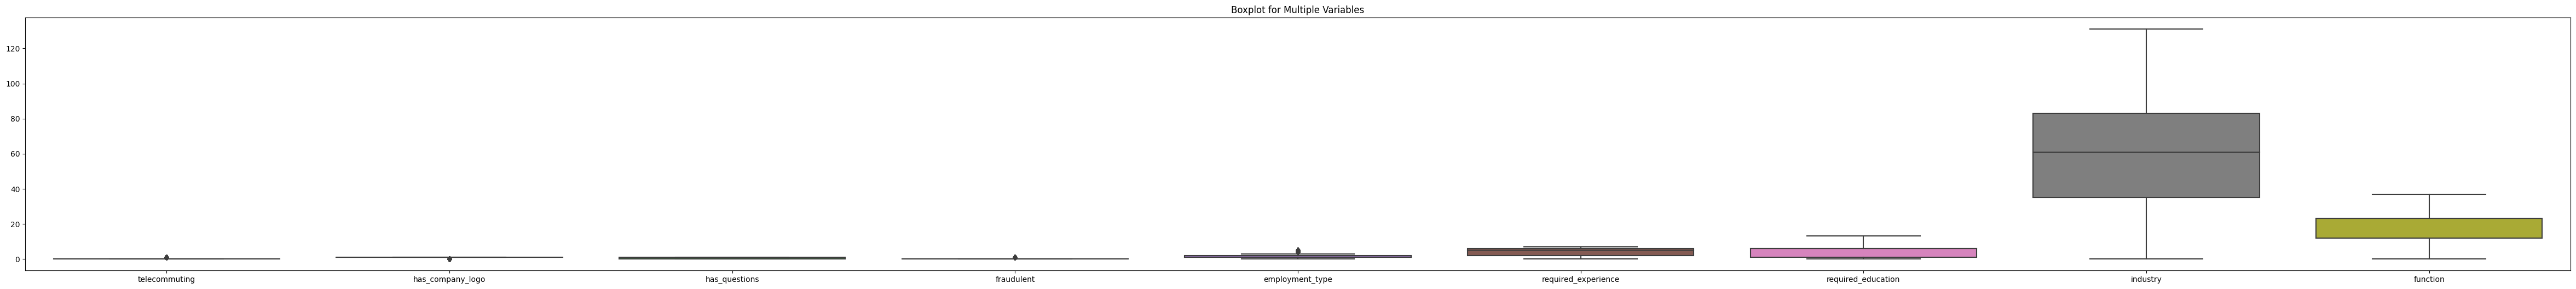

In [ ]:

# Create a boxplot for the entire dataset
plt.figure(figsize=(60, 6))
sns.boxplot(data=df)

# Show the plot
plt.title('Boxplot for Multiple Variables')
plt.show()

Since, the boxplot doesnt show any potential outliers, we consider the numerical variables to have no outliers

In [ ]:
df.shape

(17626, 16)

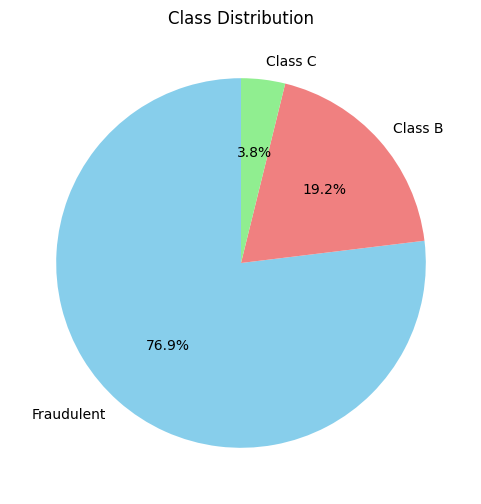

In [ ]:
import matplotlib.pyplot as plt

# Example: Replace with your actual class distribution
class_labels = ['Fraudulent', 'Class B', 'Class C']
class_counts = [200, 50, 10]  # Replace with your actual class counts

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Class Distribution')

# Show the pie chart
plt.show()


#Data Preprocessing

##Feature Engineering

### Getting word count for each text variable

In [ ]:
text_feat = ['title', 'location', 'department', 'company_profile', 'description' , 'requirements', 'benefits']


In [ ]:
# making df of text data's word count for analysis

# df for text analysis
text_count = pd.DataFrame(df['fraudulent'])

# append columns
for col in text_feat:
    count = df[col].str.split().map(lambda x: len(x))
    text_count[col+'_wc'] = count

text_count.head()

,fraudulent,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,0,2,4,1,150,138,127,127
1,0,6,3,1,166,323,205,205
2,0,4,3,1,143,50,187,187
3,0,5,3,1,90,370,195,195
4,0,3,4,1,215,187,108,108


In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function
0,Marketing Intern,"US, NY, New York",Marketing,We re Food52 and we ve created a groundbreaki...,Food52 a fast growing James Beard Award winn...,Experience with content management systems a...,Experience with content management systems a...,0,1,0,0,3,4,6,83,22
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 Seconds the worlds Cloud Video Production ...,Organised Focused Vibrant Awesome Do you...,What we expect from you Your key responsibil...,What we expect from you Your key responsibil...,0,1,0,0,1,7,6,75,7
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions ...,Our client located in Houston is actively se...,Implement pre commissioning and commissionin...,Implement pre commissioning and commissionin...,0,1,0,0,2,6,6,83,23
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI Environmental Systems Rese...,EDUCATION Bachelor s or Master s in GIS ...,EDUCATION Bachelor s or Master s in GIS ...,0,1,0,0,1,5,1,22,32
4,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review Manager LOCATIO...,QUALIFICATIONS RN license in the State of ...,QUALIFICATIONS RN license in the State of ...,0,1,1,0,1,5,1,51,16


In [ ]:
df_combined = df.assign(**text_count)


In [ ]:
df_combined.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,...,required_education,industry,function,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,Marketing Intern,"US, NY, New York",Marketing,We re Food52 and we ve created a groundbreaki...,Food52 a fast growing James Beard Award winn...,Experience with content management systems a...,Experience with content management systems a...,0,1,0,...,6,83,22,2,4,1,150,138,127,127
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 Seconds the worlds Cloud Video Production ...,Organised Focused Vibrant Awesome Do you...,What we expect from you Your key responsibil...,What we expect from you Your key responsibil...,0,1,0,...,6,75,7,6,3,1,166,323,205,205
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions ...,Our client located in Houston is actively se...,Implement pre commissioning and commissionin...,Implement pre commissioning and commissionin...,0,1,0,...,6,83,23,4,3,1,143,50,187,187
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI Environmental Systems Rese...,EDUCATION Bachelor s or Master s in GIS ...,EDUCATION Bachelor s or Master s in GIS ...,0,1,0,...,1,22,32,5,3,1,90,370,195,195
4,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review Manager LOCATIO...,QUALIFICATIONS RN license in the State of ...,QUALIFICATIONS RN license in the State of ...,0,1,1,...,1,51,16,3,4,1,215,187,108,108


In [ ]:
column_drop = ['title', 'location', 'department', 'company_profile', 'description' , 'requirements', 'benefits']
df_combined.drop(column_drop,axis=1,inplace=True)


In [ ]:
#dataframe with text variable word count
df_combined.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,0,1,0,0,3,4,6,83,22,2,4,1,150,138,127,127
1,0,1,0,0,1,7,6,75,7,6,3,1,166,323,205,205
2,0,1,0,0,2,6,6,83,23,4,3,1,143,50,187,187
3,0,1,0,0,1,5,1,22,32,5,3,1,90,370,195,195
4,0,1,1,0,1,5,1,51,16,3,4,1,215,187,108,108


In [ ]:
df_combined.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,title_wc,location_wc,department_wc,company_profile_wc,description_wc,requirements_wc,benefits_wc
0,0,1,0,0,3,4,6,83,22,2,4,1,150,138,127,127
1,0,1,0,0,1,7,6,75,7,6,3,1,166,323,205,205
2,0,1,0,0,2,6,6,83,23,4,3,1,143,50,187,187
3,0,1,0,0,1,5,1,22,32,5,3,1,90,370,195,195
4,0,1,1,0,1,5,1,51,16,3,4,1,215,187,108,108


###Correlation Analysis of Separated Text Data Word Count & The Dataframe


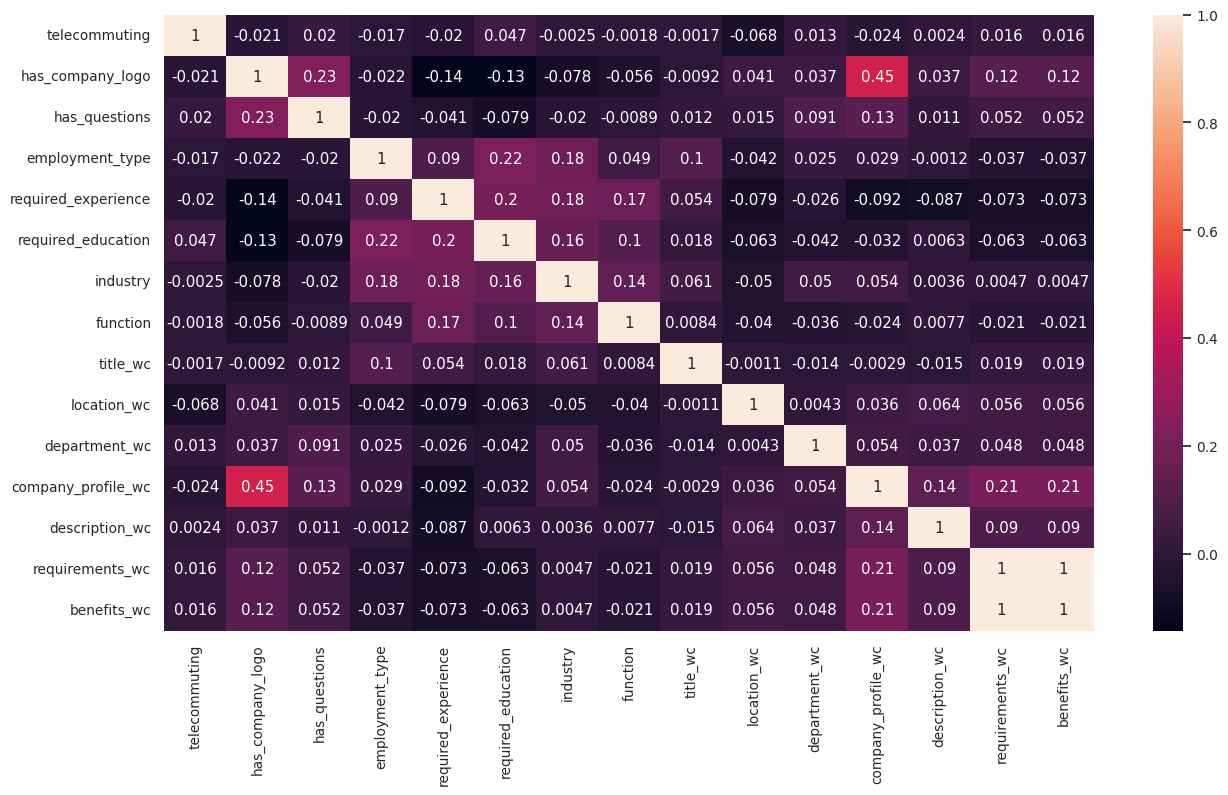

In [ ]:
# Set a larger figure size
plt.figure(figsize=(15, 8))

# Set a larger font size for the correlation matrix
sns.set(font_scale=0.9)

sns.heatmap(df_combined.drop(columns=['fraudulent']).corr(), annot=True);
#revise balik

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = df_combined.columns
vif_data["VIF"] = [variance_inflation_factor(df_combined.values, i) for i in range(df_combined.shape[1])]

# Display the VIF data
print(vif_data)


               Variable        VIF
0         telecommuting   1.051980
1      has_company_logo   6.145772
2         has_questions   2.099417
3            fraudulent   1.137916
4       employment_type   3.332647
5   required_experience   4.875566
6    required_education   4.012928
7              industry   5.844258
8              function   6.010799
9              title_wc   4.158552
10          location_wc  11.229144
11        department_wc   4.880388
12   company_profile_wc   2.883365
13       description_wc   2.957399
14      requirements_wc        inf
15          benefits_wc        inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Based on the heatmap and VIF, we discovered there is multicollinearity issue, so we decided to combine all the text variable and have the word count instead to analyze the impact of word count on job posting on fraudulent classification

### Combining All Text Columns & Getting Word Count

In [ ]:
#Creating a new column to store all textual data by appending the columns with strings
df['text']=df[['title','company_profile','description','requirements','benefits']].agg(' '.join,axis=1)
dftext=df[['text','fraudulent']]
dftext.head()

,text,fraudulent
0,Marketing Intern We re Food52 and we ve creat...,0
1,Customer Service - Cloud Video Production 90 S...,0
2,Commissioning Machinery Assistant (CMA) Valo...,0
3,Account Executive - Washington DC Our passion ...,0
4,Bill Review Manager SpotSource Solutions LLC i...,0


In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,text
0,Marketing Intern,"US, NY, New York",Marketing,We re Food52 and we ve created a groundbreaki...,Food52 a fast growing James Beard Award winn...,Experience with content management systems a...,Experience with content management systems a...,0,1,0,0,3,4,6,83,22,Marketing Intern We re Food52 and we ve creat...
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 Seconds the worlds Cloud Video Production ...,Organised Focused Vibrant Awesome Do you...,What we expect from you Your key responsibil...,What we expect from you Your key responsibil...,0,1,0,0,1,7,6,75,7,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions ...,Our client located in Houston is actively se...,Implement pre commissioning and commissionin...,Implement pre commissioning and commissionin...,0,1,0,0,2,6,6,83,23,Commissioning Machinery Assistant (CMA) Valo...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI Environmental Systems Rese...,EDUCATION Bachelor s or Master s in GIS ...,EDUCATION Bachelor s or Master s in GIS ...,0,1,0,0,1,5,1,22,32,Account Executive - Washington DC Our passion ...
4,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review Manager LOCATIO...,QUALIFICATIONS RN license in the State of ...,QUALIFICATIONS RN license in the State of ...,0,1,1,0,1,5,1,51,16,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
#make a new df with dropped columns to analyze whether collinearity improve or not

column_drop = ['title','company_profile','description','requirements','benefits','location','department']
new_df = df.drop(columns= column_drop)


In [ ]:
new_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,text
0,0,1,0,0,3,4,6,83,22,Marketing Intern We re Food52 and we ve creat...
1,0,1,0,0,1,7,6,75,7,Customer Service - Cloud Video Production 90 S...
2,0,1,0,0,2,6,6,83,23,Commissioning Machinery Assistant (CMA) Valo...
3,0,1,0,0,1,5,1,22,32,Account Executive - Washington DC Our passion ...
4,0,1,1,0,1,5,1,51,16,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
new_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,text
0,0,1,0,0,3,4,6,83,22,Marketing Intern We re Food52 and we ve creat...
1,0,1,0,0,1,7,6,75,7,Customer Service - Cloud Video Production 90 S...
2,0,1,0,0,2,6,6,83,23,Commissioning Machinery Assistant (CMA) Valo...
3,0,1,0,0,1,5,1,22,32,Account Executive - Washington DC Our passion ...
4,0,1,1,0,1,5,1,51,16,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:

# Function to count words in a text
def count_words(text):
    return len(text.split())

# Apply the function to the text column and create a new column 'word_count'
new_df['word_count'] = new_df['text'].apply(count_words)

# Display the updated DataFrame
print(new_df)

       telecommuting  has_company_logo  has_questions  fraudulent  \
0                  0                 1              0           0   
1                  0                 1              0           0   
2                  0                 1              0           0   
3                  0                 1              0           0   
4                  0                 1              1           0   
...              ...               ...            ...         ...   
17875              0                 1              1           0   
17876              0                 1              1           0   
17877              0                 0              0           0   
17878              0                 0              1           0   
17879              0                 1              1           0   

       employment_type  required_experience  required_education  industry  \
0                    3                    4                   6        83   
1                

In [ ]:
new_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,text,word_count
0,0,1,0,0,3,4,6,83,22,Marketing Intern We re Food52 and we ve creat...,544
1,0,1,0,0,1,7,6,75,7,Customer Service - Cloud Video Production 90 S...,905
2,0,1,0,0,2,6,6,83,23,Commissioning Machinery Assistant (CMA) Valo...,571
3,0,1,0,0,1,5,1,22,32,Account Executive - Washington DC Our passion ...,855
4,0,1,1,0,1,5,1,51,16,Bill Review Manager SpotSource Solutions LLC i...,621


In [ ]:
new_df = new_df.drop('text', axis=1)


In [ ]:
new_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,word_count
0,0,1,0,0,3,4,6,83,22,544
1,0,1,0,0,1,7,6,75,7,905
2,0,1,0,0,2,6,6,83,23,571
3,0,1,0,0,1,5,1,22,32,855
4,0,1,1,0,1,5,1,51,16,621


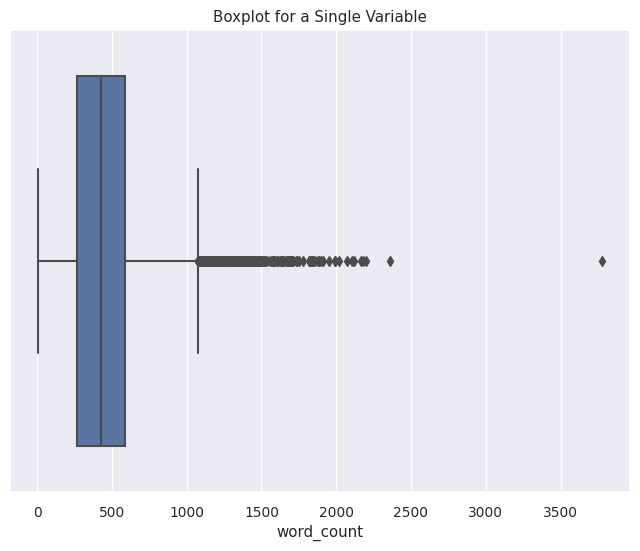

In [ ]:
# Create a boxplot for a single variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='word_count', data=new_df)


# Show the plot
plt.title('Boxplot for a Single Variable')
plt.show()

We discovered there is an extreme outlier from the word_count variable

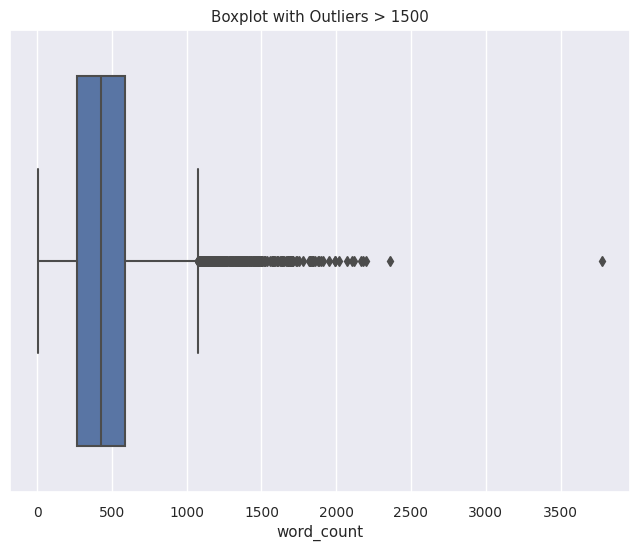

       telecommuting  has_company_logo  has_questions  fraudulent  \
172                0                 1              0           0   
572                0                 0              0           0   
901                0                 1              1           0   
1031               0                 1              0           0   
1429               0                 1              0           0   
...              ...               ...            ...         ...   
15611              0                 1              1           0   
15684              0                 1              0           0   
15701              0                 1              0           0   
16017              0                 1              1           0   
17315              0                 1              0           0   

       employment_type  required_experience  required_education  industry  \
172                  1                    0                   6        79   
572              

In [ ]:
#check for outlier for the word count data

# Create a boxplot for a single variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='word_count', data=new_df)

# Set your specified threshold
threshold = 1500

# Identify points exceeding the threshold
outliers = new_df[new_df['word_count'] > threshold]

# Annotate the outlier points on the boxplot
for index, row in outliers.iterrows():
    plt.annotate(row['word_count'], (1, row['word_count']), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8, color='red')

# Show the plot
plt.title(f'Boxplot with Outliers > {threshold}')
plt.show()

print(outliers)

###Correlation Analysis of Combined Text Data & The Dataframe




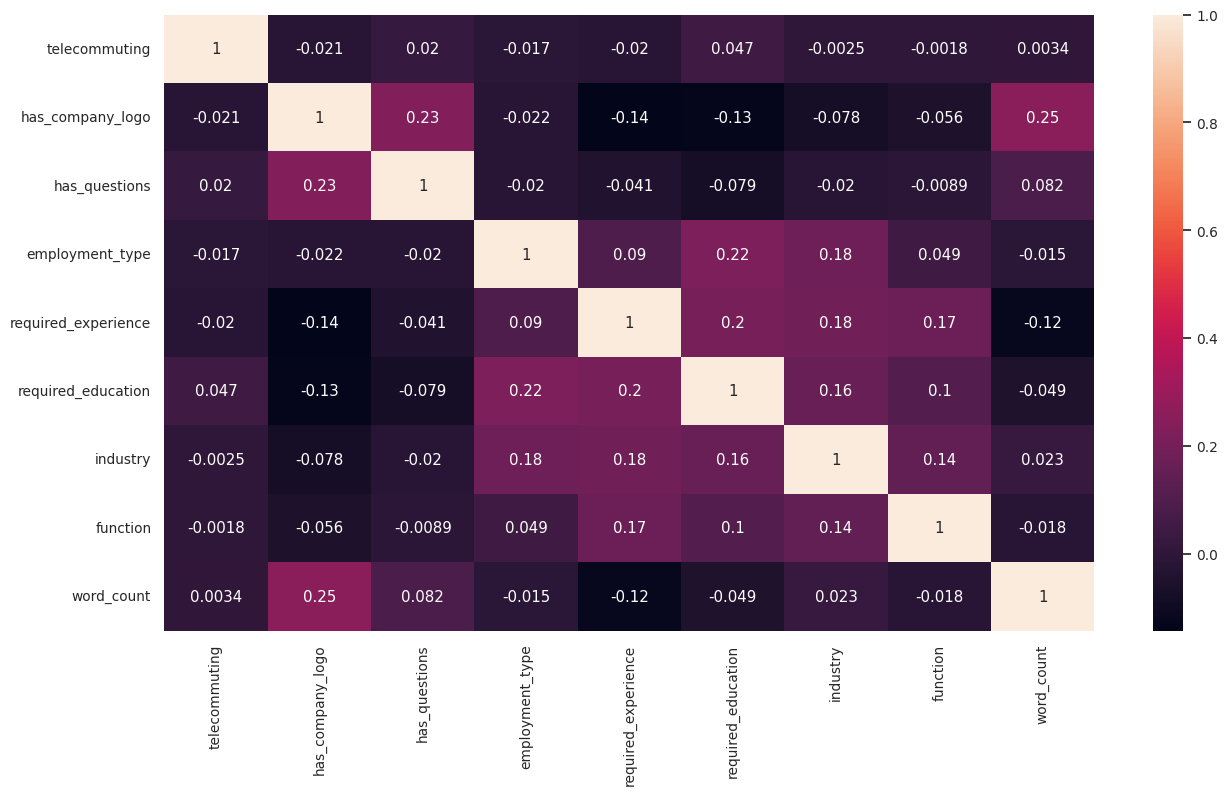

In [ ]:
# Set a larger figure size
plt.figure(figsize=(15, 8))

# Set a larger font size for the correlation matrix
sns.set(font_scale=0.9)

sns.heatmap(new_df.drop(columns=['fraudulent']).corr(), annot=True);
#revise balik

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = new_df.columns
vif_data["VIF"] = [variance_inflation_factor(new_df.values, i) for i in range(new_df.shape[1])]

# Display the VIF data
print(vif_data)

#VIF between 5-10 indicates a problem


              Variable       VIF
0        telecommuting  1.049065
1     has_company_logo  4.713591
2        has_questions  2.056861
3           fraudulent  1.102091
4      employment_type  3.241815
5  required_experience  4.644106
6   required_education  3.926949
7             industry  5.526645
8             function  5.517067
9           word_count  3.872382


From the heatmap & VIF, we discovered that industry,function,might cause have moderate multicollinearity. it exists but it's not critical.


<Axes: >

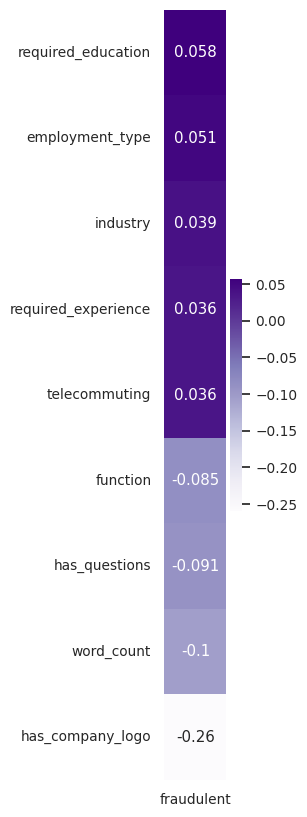

In [ ]:
fig = plt.figure(figsize=(1,10))
fig.set_facecolor('white')
sns.heatmap(new_df.corr()[['fraudulent']].sort_values('fraudulent', ascending=False)[1:], annot=True, cmap="Purples")


### Univariate Feature Selection

We employ statistical test stuch as chi-squared test to evaluate the significance of each feature individually with respect to the target variable.

In [ ]:
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

Null Hypothesis (H0): There is no association between the categorical feature and the target variable.

Alternative Hypothesis (H1): There is an association between the categorical feature and the target variable.

In [ ]:
X = new_df.drop('fraudulent',axis=1)
y = new_df['fraudulent']

In [ ]:

# Iterate over each feature and perform the chi-square test
significant_features = []
alpha = 0.05  # Set your significance level

for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Check significance
    if p_value < alpha:
        print(f"{feature} is significant (p-value: {p_value})")
        significant_features.append(feature)
    else:
        print(f"{feature} is not significant (p-value: {p_value})")


telecommuting is significant (p-value: 3.4222547409866655e-06)
has_company_logo is significant (p-value: 1.7363500096290326e-259)
has_questions is significant (p-value: 3.243978680466296e-33)
employment_type is significant (p-value: 1.7100346272840589e-19)
required_experience is significant (p-value: 1.4735226554587945e-23)
required_education is significant (p-value: 1.355898156966844e-91)
industry is significant (p-value: 6.0122578694241075e-251)
function is significant (p-value: 1.7496470848593774e-92)
word_count is significant (p-value: 1.896767383010584e-146)


Conclusion : Based on the correlation analysis & univariate feature selection analysis, we reject H0, and conclude that the remaining variables are significant to the model

### Scale & Normalize the Data

In [ ]:
df.head()

,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,text
0,Marketing Intern,"US, NY, New York",Marketing,We re Food52 and we ve created a groundbreaki...,Food52 a fast growing James Beard Award winn...,Experience with content management systems a...,Experience with content management systems a...,0,1,0,0,3,4,6,83,22,Marketing Intern We re Food52 and we ve creat...
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,90 Seconds the worlds Cloud Video Production ...,Organised Focused Vibrant Awesome Do you...,What we expect from you Your key responsibil...,What we expect from you Your key responsibil...,0,1,0,0,1,7,6,75,7,Customer Service - Cloud Video Production 90 S...
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Missing,Valor Services provides Workforce Solutions ...,Our client located in Houston is actively se...,Implement pre commissioning and commissionin...,Implement pre commissioning and commissionin...,0,1,0,0,2,6,6,83,23,Commissioning Machinery Assistant (CMA) Valo...
3,Account Executive - Washington DC,"US, DC, Washington",Sales,Our passion for improving quality of life thro...,THE COMPANY ESRI Environmental Systems Rese...,EDUCATION Bachelor s or Master s in GIS ...,EDUCATION Bachelor s or Master s in GIS ...,0,1,0,0,1,5,1,22,32,Account Executive - Washington DC Our passion ...
4,Bill Review Manager,"US, FL, Fort Worth",Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE Itemization Review Manager LOCATIO...,QUALIFICATIONS RN license in the State of ...,QUALIFICATIONS RN license in the State of ...,0,1,1,0,1,5,1,51,16,Bill Review Manager SpotSource Solutions LLC i...


In [ ]:
new_df.shape

(17626, 10)

In [ ]:
numerical_columns = ['telecommuting', 'has_company_logo', 'has_questions',
       'employment_type', 'required_experience', 'required_education',
       'industry', 'function', 'word_count']


In [ ]:
print(numerical_columns)

['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'word_count']


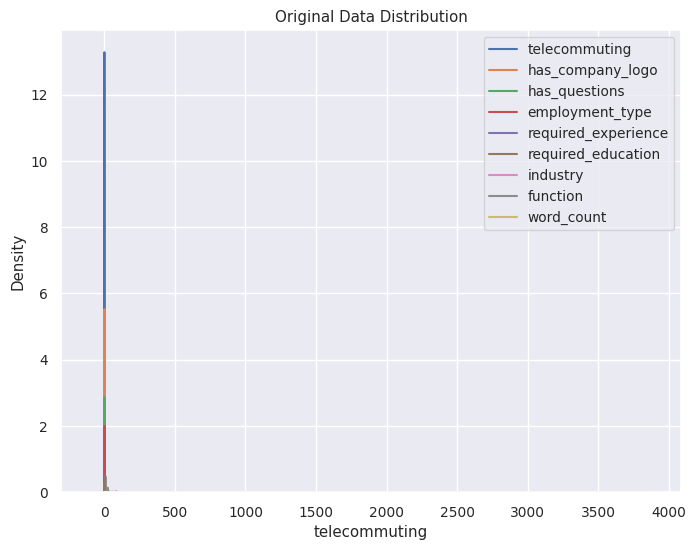

In [ ]:

# Original Data Distribution Plot
plt.figure(figsize=(8, 6))  # Set width to 8 inches
plt.title('Original Data Distribution')
for column in numerical_columns:
    sns.kdeplot(new_df[column], label=column)

plt.legend()
plt.show()


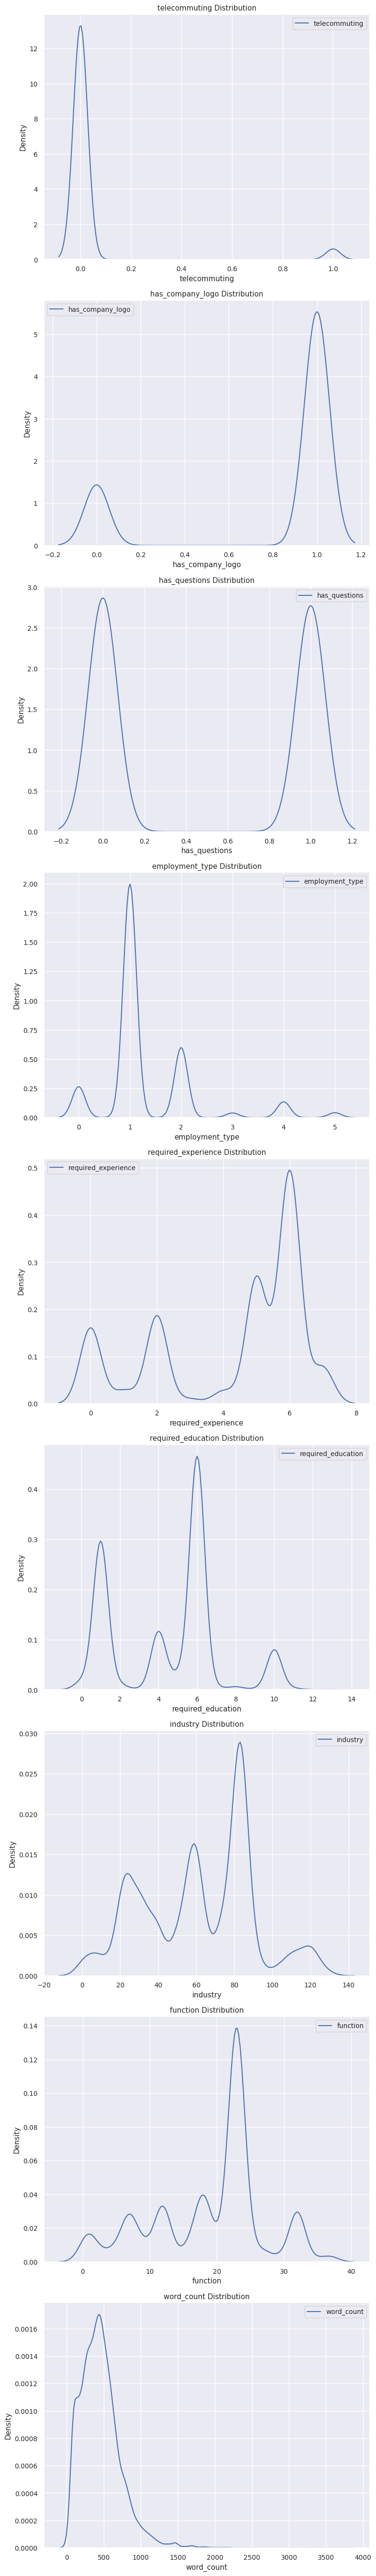

In [ ]:
# Create separate subplots for each column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 6 * len(numerical_columns)))

# Plot KDE for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(new_df[column], ax=axes[i], label=column)
    axes[i].legend()
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


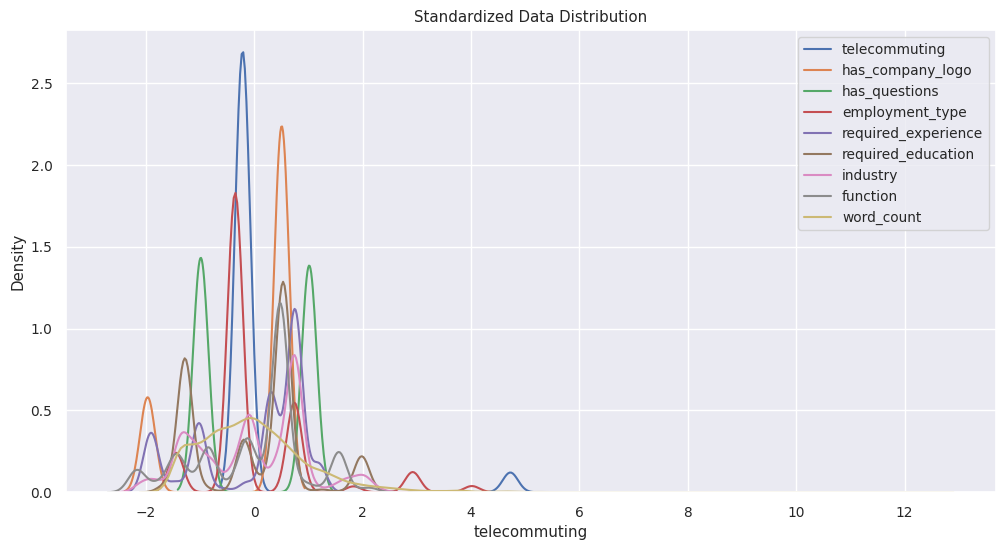

In [ ]:

# Standardization (Z-score Normalization)
scaler_standard = StandardScaler()
df_standardized = new_df.copy()
df_standardized[numerical_columns] = scaler_standard.fit_transform(new_df[numerical_columns])

# Standardized Data Distribution Plot
plt.figure(figsize=(12, 6))
plt.title('Standardized Data Distribution')
for column in numerical_columns:
    sns.kdeplot(df_standardized[column], label=column)

plt.legend()
plt.show()



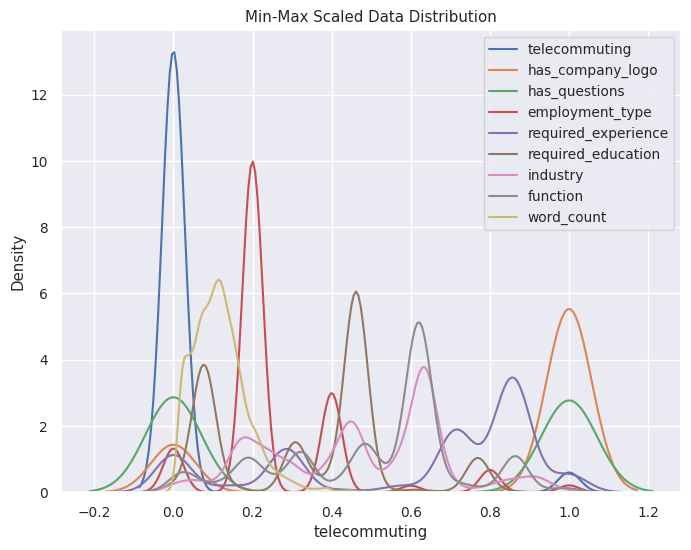

In [ ]:

# Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = new_df.copy()
df_minmax[numerical_columns] = scaler_minmax.fit_transform(new_df[numerical_columns])

# Min-Max Scaled Data Distribution Plot
plt.figure(figsize=(8, 6))  # Set width to 8 inches
plt.title('Min-Max Scaled Data Distribution')
for column in numerical_columns:
    sns.kdeplot(df_minmax[column], label=column)

plt.legend()
plt.show()

In [ ]:
summary_statistics_minmax = df_minmax[numerical_columns].describe()
print("\nSummary Statistics for Min-Max Scaled Data:")
print(summary_statistics_minmax)


Summary Statistics for Min-Max Scaled Data:
       telecommuting  has_company_logo  has_questions  employment_type  \
count   17626.000000      17626.000000   17626.000000     17626.000000   
mean        0.042834          0.793998       0.491603         0.263951   
std         0.202489          0.404444       0.499944         0.183234   
min         0.000000          0.000000       0.000000         0.000000   
25%         0.000000          1.000000       0.000000         0.200000   
50%         0.000000          1.000000       0.000000         0.200000   
75%         0.000000          1.000000       1.000000         0.400000   
max         1.000000          1.000000       1.000000         1.000000   

       required_experience  required_education      industry      function  \
count         17626.000000        17626.000000  17626.000000  17626.000000   
mean              0.614150            0.347817      0.468767      0.511874   
std               0.323236            0.212357      0.

In [ ]:
new_df[numerical_columns] = df_minmax[numerical_columns]


In [ ]:
new_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,word_count
0,0.0,1.0,0.0,0,0.6,0.571429,0.461538,0.633588,0.594595,0.142478
1,0.0,1.0,0.0,0,0.2,1.000000,0.461538,0.572519,0.189189,0.238259
2,0.0,1.0,0.0,0,0.4,0.857143,0.461538,0.633588,0.621622,0.149642
3,0.0,1.0,0.0,0,0.2,0.714286,0.076923,0.167939,0.864865,0.224993
4,0.0,1.0,1.0,0,0.2,0.714286,0.076923,0.389313,0.432432,0.162908


In [ ]:
df = new_df

In [ ]:
df.head(10)

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,word_count
0,0.0,1.0,0.0,0,0.6,0.571429,0.461538,0.633588,0.594595,0.142478
1,0.0,1.0,0.0,0,0.2,1.000000,0.461538,0.572519,0.189189,0.238259
2,0.0,1.0,0.0,0,0.4,0.857143,0.461538,0.633588,0.621622,0.149642
3,0.0,1.0,0.0,0,0.2,0.714286,0.076923,0.167939,0.864865,0.224993
4,0.0,1.0,1.0,0,0.2,0.714286,0.076923,0.389313,0.432432,0.162908
5,0.0,0.0,0.0,0,0.4,0.857143,0.461538,0.633588,0.621622,0.133192
6,0.0,1.0,1.0,0,0.2,0.714286,0.384615,0.687023,0.540541,0.099761
7,0.0,1.0,1.0,0,0.4,0.857143,0.461538,0.633588,0.621622,0.183603
8,0.0,1.0,1.0,0,0.2,0.000000,0.461538,0.442748,0.621622,0.083311
9,0.0,1.0,0.0,0,0.8,0.285714,0.307692,0.297710,0.189189,0.126824


In [ ]:
#set a dataframe that this is unbalanced data. we will use this later for baseline in model building section

unbalanced_df = df

In [ ]:
# Assuming 'df' is your DataFrame with features and 'target_column' is your target variable column
X = unbalanced_df.drop(columns=['fraudulent'])  # Extract features, adjust 'target_column' to your actual target column name
y = unbalanced_df['fraudulent']  # Extract target variable

# Optional: Check the first few rows of X and y to ensure they are correct
print("Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Features (X):
   telecommuting  has_company_logo  has_questions  employment_type  \
0            0.0               1.0            0.0              0.6   
1            0.0               1.0            0.0              0.2   
2            0.0               1.0            0.0              0.4   
3            0.0               1.0            0.0              0.2   
4            0.0               1.0            1.0              0.2   

   required_experience  required_education  industry  function  word_count  
0             0.571429            0.461538  0.633588  0.594595    0.142478  
1             1.000000            0.461538  0.572519  0.189189    0.238259  
2             0.857143            0.461538  0.633588  0.621622    0.149642  
3             0.714286            0.076923  0.167939  0.864865    0.224993  
4             0.714286            0.076923  0.389313  0.432432    0.162908  

Target Variable (y):
0    0
1    0
2    0
3    0
4    0
Name: fraudulent, dtype: int64


Since after normalizing the data, the plot show that the distribution of each variable if now centred at 0. and the scale of each variable is now between 1 and 0. this is important because we want to use distance-based algorithm which is sensitive to the scale of the data

In [ ]:
unbalanced_df.head()

,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,word_count
0,0.0,1.0,0.0,0,0.6,0.571429,0.461538,0.633588,0.594595,0.142478
1,0.0,1.0,0.0,0,0.2,1.000000,0.461538,0.572519,0.189189,0.238259
2,0.0,1.0,0.0,0,0.4,0.857143,0.461538,0.633588,0.621622,0.149642
3,0.0,1.0,0.0,0,0.2,0.714286,0.076923,0.167939,0.864865,0.224993
4,0.0,1.0,1.0,0,0.2,0.714286,0.076923,0.389313,0.432432,0.162908


In [ ]:
unbalanced_df.describe()


,telecommuting,has_company_logo,has_questions,fraudulent,employment_type,required_experience,required_education,industry,function,word_count
count,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000,17626.000000
mean,0.042834,0.793998,0.491603,0.048565,0.263951,0.614150,0.347817,0.468767,0.511874,0.118736
std,0.202489,0.404444,0.499944,0.214962,0.183234,0.323236,0.212357,0.221579,0.225286,0.070649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.200000,0.285714,0.076923,0.267176,0.324324,0.068718
50%,0.000000,1.000000,0.000000,0.000000,0.200000,0.714286,0.461538,0.465649,0.621622,0.111701
75%,0.000000,1.000000,1.000000,0.000000,0.400000,0.857143,0.461538,0.633588,0.621622,0.154683
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Use ANOVA F-Test Feature Selection

H₀ : All categories mean values are same (i.e μA=μB=μC)

Hₐ : At least one of the categories mean values differ

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # Chi-Squared test belongs the class of filter methods

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import f

# Assuming 'unbalanced_df' is your DataFrame
X = unbalanced_df.drop(['fraudulent'], axis=1)
Y =unbalanced_df['fraudulent']

# Feature extraction
k_best = SelectKBest(score_func=f_classif, k='all')
fit = k_best.fit(X, Y)

# Feature Selection result
fsr = pd.DataFrame({
    'feature': X.columns,
    'score': fit.scores_,
    'p-value': fit.pvalues_,
})

# Display F-scores and p-values
print(fsr)

# Calculate critical value
alpha = 0.05
df_between = 1  # replace with actual degrees of freedom between groups
df_within = len(X) - 2  # replace with actual degrees of freedom within groups
critical_value = f.ppf(1 - alpha, df_between, df_within)

# Print critical value
print("Critical Value:", critical_value)

# Make decisions based on p-values
alpha = 0.05
significant_features = fsr[fsr['p-value'] < alpha]['feature'].tolist()

# Degrees of freedom calculation
num_groups = len(pd.unique(Y))  # Number of unique classes/groups
total_observations = len(Y)  # Total number of observations

df_between = num_groups - 1  # Degrees of freedom for between-group variance
df_within = total_observations - num_groups  # Degrees of freedom for within-group variance

print("Degrees of Freedom (Between):", df_between)
print("Degrees of Freedom (Within):", df_within)
# Print significant features
print("Significant Features:", significant_features)


               feature        score        p-value
0        telecommuting    22.400942   2.229840e-06
1     has_company_logo  1272.666577  3.393958e-269
2        has_questions   146.210114   1.585508e-33
3      employment_type    45.577019   1.513278e-11
4  required_experience    22.782146   1.828994e-06
5   required_education    58.675462   1.955538e-14
6             industry    27.431072   1.646657e-07
7             function   129.097818   8.197811e-30
8           word_count   195.654885   3.195772e-44
Critical Value: 3.8419865147261625
Degrees of Freedom (Between): 1
Degrees of Freedom (Within): 17624
Significant Features: ['telecommuting', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'word_count']


<Axes: xlabel='score', ylabel='feature'>

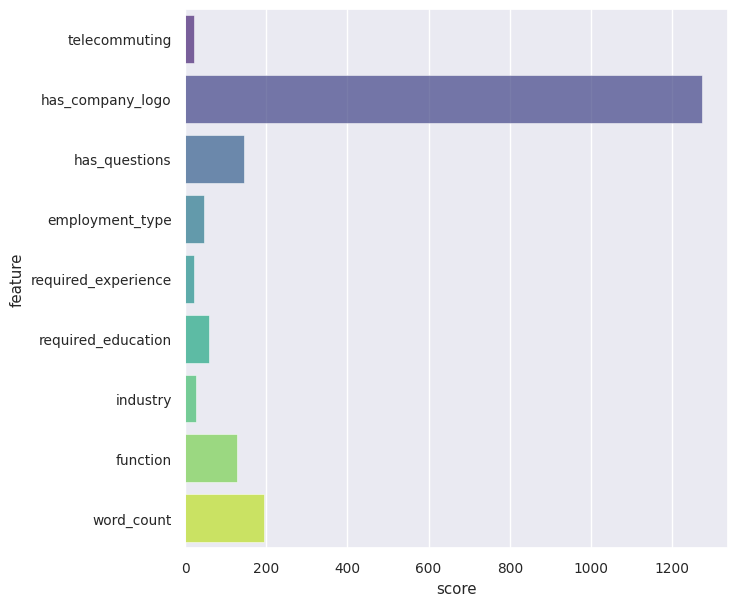

In [ ]:
#Visualize the feature scores
fig, ax=plt.subplots(figsize=(7,7))
plot=sns.barplot(data=fsr, x='score', y='feature', palette='viridis',linewidth=0.5, saturation=2, orient='h',alpha=0.7)
plot

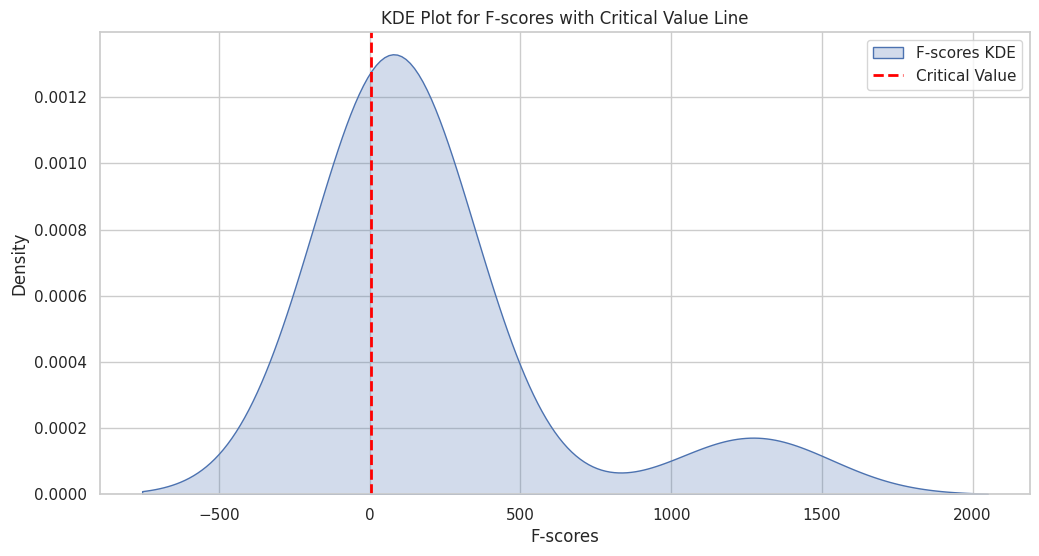

In [ ]:
from scipy.stats import f, norm

# Calculate critical value
alpha = 0.05
df_between = 1  # replace with actual degrees of freedom between groups
df_within = len(X) - 2  # replace with actual degrees of freedom within groups
critical_value = f.ppf(1 - alpha, df_between, df_within)

# Create KDE plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot KDE for F-scores
sns.kdeplot(fsr['score'], fill=True, label='F-scores KDE')

# Plot critical value line
plt.axvline(critical_value, color='red', linestyle='dashed', linewidth=2, label='Critical Value')

# Set plot labels and title
plt.xlabel('F-scores')
plt.ylabel('Density')
plt.title('KDE Plot for F-scores with Critical Value Line')

# Add legend
plt.legend()

# Show plot
plt.show()

#Model Building

We test the model on the following algorithms :
* Naive Bayes
* K-NN
* SVM (kalau sempat)
* Decision Tree
* Random Forest
* AdaBoosting
* Gradient Boosting

### Setting a baseline of the model

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# Assuming you have numpy arrays X and y for classification
y = unbalanced_df['fraudulent']
X = unbalanced_df.drop(columns=['fraudulent'])
# Create a DummyClassifier with a strategy (most_frequent means it predicts the most frequent class)
baseline_classifier = DummyClassifier(strategy="most_frequent")

# Fit the baseline model
baseline_classifier.fit(X, y)

# Make predictions
y_pred_baseline = baseline_classifier.predict(X)

# Display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_baseline)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report_baseline = classification_report(y, y_pred_baseline)
print("Baseline Classification Report:\n", report_baseline)


Confusion Matrix:
 [[16770     0]
 [  856     0]]
Baseline Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     16770
           1       0.00      0.00      0.00       856

    accuracy                           0.95     17626
   macro avg       0.48      0.50      0.49     17626
weighted avg       0.91      0.95      0.93     17626



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(y, y_pred_baseline)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.5


In [ ]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y, y_pred_baseline)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[16770     0]
 [  856     0]]


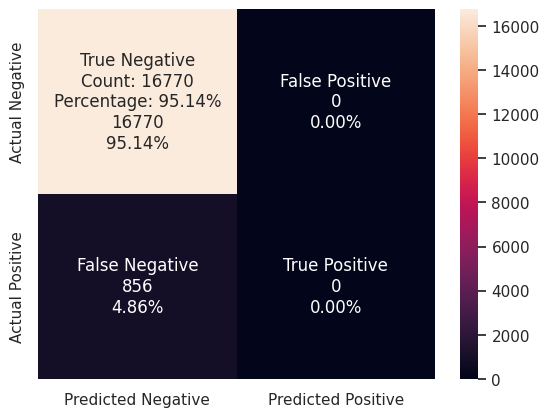

In [ ]:

# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()


In [ ]:
y = unbalanced_df['fraudulent']
X = unbalanced_df.drop(columns=['fraudulent'])

### Choosing the best k for Cross Validation

In [ ]:
import numpy as np

# Extract the target variable 'fraudulent' as y
y = unbalanced_df['fraudulent'].values

# Extract the feature matrix X by dropping the 'fraudulent' column
X = unbalanced_df.drop(columns=['fraudulent']).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)


In [ ]:
folds = range(2,11)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(random_state=42)

def evaluate_model(cv):
    accuracies = cross_val_score(logreg_model, X, y, scoring='accuracy', cv=cv)
    return accuracies.mean(), accuracies.min(), accuracies.max()

# Replace 'logreg_model', 'X', and 'y' with your logistic regression model and data

# Assuming 'folds' is a list of values representing the number of folds (e.g., [5, 10, 15])
for k in folds:
    # Define the StratifiedKFold with 'k' splits
    cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=10)

    # Record mean, min, and max of each set of results
    k_mean, k_min, k_max = evaluate_model(cv)

    # Report performance
    print('-> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))


-> folds=2, accuracy=0.952 (0.952,0.952)
-> folds=3, accuracy=0.953 (0.952,0.953)
-> folds=4, accuracy=0.953 (0.952,0.954)
-> folds=5, accuracy=0.953 (0.952,0.954)
-> folds=6, accuracy=0.953 (0.951,0.954)
-> folds=7, accuracy=0.953 (0.951,0.954)
-> folds=8, accuracy=0.953 (0.951,0.954)
-> folds=9, accuracy=0.953 (0.951,0.954)
-> folds=10, accuracy=0.953 (0.951,0.955)


###Logistic Regression


In [ ]:
import numpy as np

# Extract the target variable 'fraudulent' as y
y = unbalanced_df['fraudulent'].values

# Extract the feature matrix X by dropping the 'fraudulent' column
X = unbalanced_df.drop(columns=['fraudulent']).values

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler


# Define the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Fit the logistic regression model on the resampled training set
    logreg_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = logreg_model.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)


Confusion Matrix:
 [[13194  3576]
 [  261   595]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87     16770
           1       0.14      0.70      0.24       856

    accuracy                           0.78     17626
   macro avg       0.56      0.74      0.55     17626
weighted avg       0.94      0.78      0.84     17626



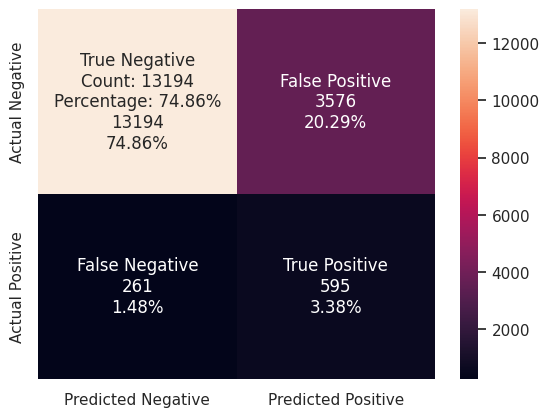

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

In [ ]:

# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.7409277665390467


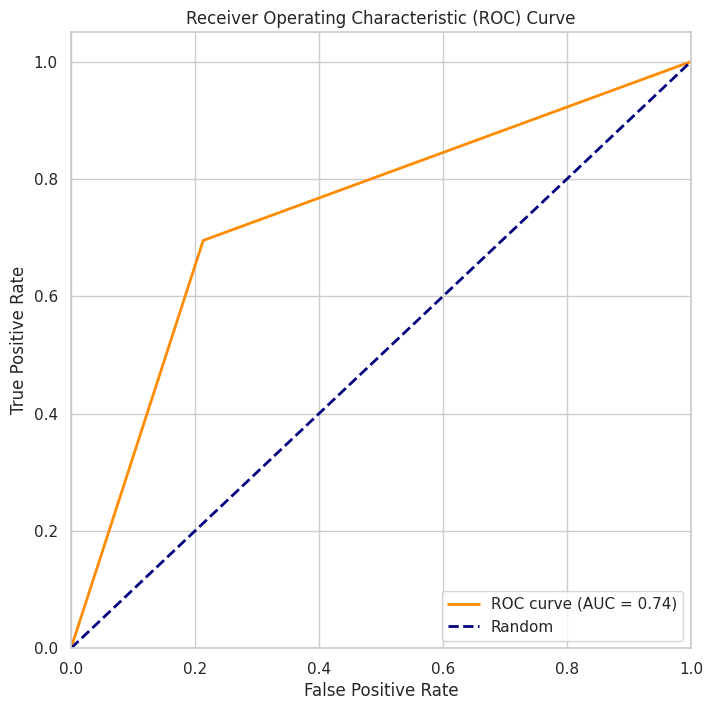

In [ ]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score
fpr, tpr, _ = roc_curve(all_true_labels, all_predictions)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#Held out test


# Assuming you have a dataset (X, y) where X is your feature matrix and y is the target variable
# X and y should be numpy arrays or pandas DataFrames/Series

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Perform oversampling on the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the logistic regression model on the oversampled training set
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the held-out test set
y_pred_test = logreg_model.predict(X_test)

# Display the classification report for the test set
report_test = classification_report(y_test, y_pred_test)
print("Test Set Classification Report:\n", report_test)

# Display the confusion matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Test Set Confusion Matrix:\n", conf_matrix_test)


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87      3348
           1       0.14      0.69      0.24       178

    accuracy                           0.78      3526
   macro avg       0.56      0.73      0.55      3526
weighted avg       0.94      0.78      0.84      3526

Test Set Confusion Matrix:
 [[2626  722]
 [  56  122]]


###Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Assuming you have numpy arrays X and y

# Define the Naive Bayes classifier (MultinomialNB for text or categorical features)
naive_bayes = MultinomialNB()

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Train the Naive Bayes model on the resampled training set
    naive_bayes.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = naive_bayes.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)


Confusion Matrix:
 [[13333  3437]
 [  279   577]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.80      0.88     16770
           1       0.14      0.67      0.24       856

    accuracy                           0.79     17626
   macro avg       0.56      0.73      0.56     17626
weighted avg       0.94      0.79      0.85     17626



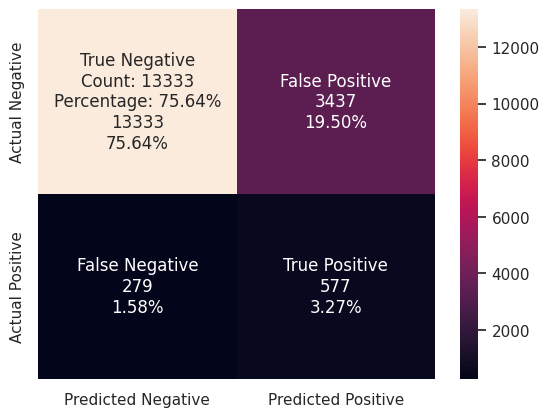

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

ROC-AUC Score: 0.7345580531545539


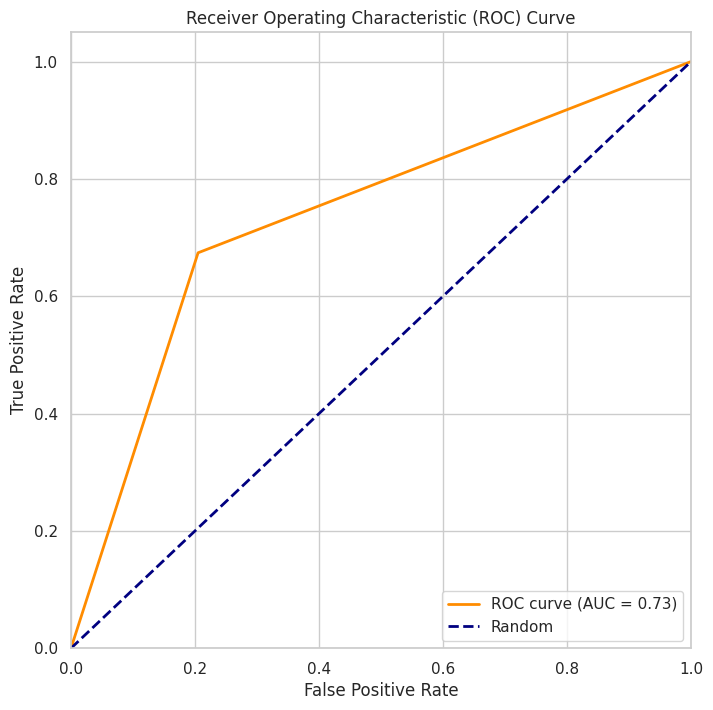

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score

fpr, tpr, _ = roc_curve(all_true_labels, all_predictions,drop_intermediate=False)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Naive Bayes classifier (MultinomialNB for text or categorical features)
naive_bayes = MultinomialNB()

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Oversample the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the Naive Bayes model on the resampled training set
naive_bayes.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = naive_bayes.predict(X_test)

# Display the classification report for the hold-out test
report_test = classification_report(y_test, y_pred_test)
print("Hold-out Test Classification Report:\n", report_test)

# Display the confusion matrix for the hold-out test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Hold-out Test Confusion Matrix:\n", conf_matrix_test)


Hold-out Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.79      0.87      3348
           1       0.14      0.67      0.24       178

    accuracy                           0.78      3526
   macro avg       0.56      0.73      0.55      3526
weighted avg       0.94      0.78      0.84      3526

Hold-out Test Confusion Matrix:
 [[2635  713]
 [  58  120]]


###k-Nearest Neighbors

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Assuming you have numpy arrays X and y

# Define the k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Train the k-Nearest Neighbors model on the resampled training set
    knn.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = knn.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)


# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)



Confusion Matrix:
 [[15893   877]
 [  246   610]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97     16770
           1       0.41      0.71      0.52       856

    accuracy                           0.94     17626
   macro avg       0.70      0.83      0.74     17626
weighted avg       0.96      0.94      0.94     17626



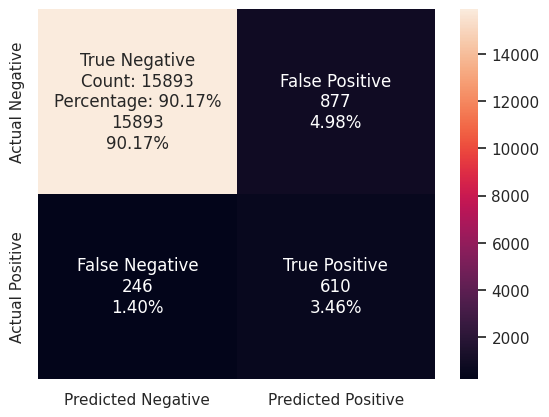

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

ROC-AUC Score: 0.8301605280903259


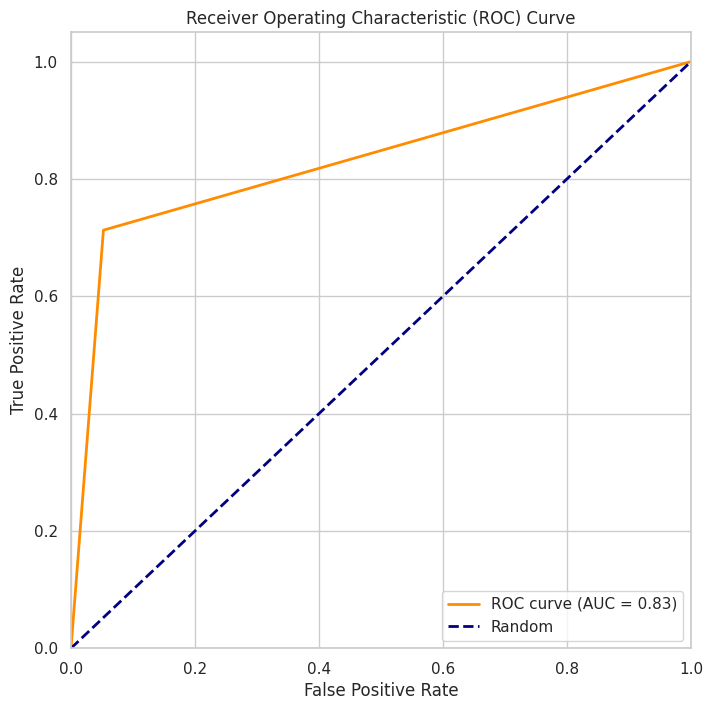

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score

fpr, tpr, _ = roc_curve(all_true_labels, all_predictions,drop_intermediate=False)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#hold out test
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the k-Nearest Neighbors classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Oversample the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the k-Nearest Neighbors model on the resampled training set
knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = knn.predict(X_test)

# Display the classification report for the hold-out test
report_test = classification_report(y_test, y_pred_test)
print("Hold-out Test Classification Report:\n", report_test)

# Display the confusion matrix for the hold-out test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Hold-out Test Confusion Matrix:\n", conf_matrix_test)


Hold-out Test Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      3348
           1       0.42      0.69      0.52       178

    accuracy                           0.94      3526
   macro avg       0.70      0.82      0.74      3526
weighted avg       0.95      0.94      0.94      3526

Hold-out Test Confusion Matrix:
 [[3178  170]
 [  55  123]]


### Random Forest


In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

# Assuming you have a dataset (X, y) where X is your feature matrix and y is the target variable
# X and y should be numpy arrays or pandas DataFrames/Series

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Fit the Random Forest model on the resampled training set
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98     16770
           1       0.71      0.64      0.67       856

    accuracy                           0.97     17626
   macro avg       0.84      0.82      0.83     17626
weighted avg       0.97      0.97      0.97     17626



In [ ]:

# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[16541   229]
 [  304   552]]


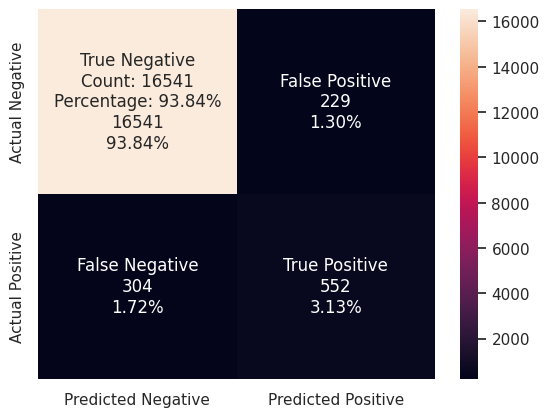

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

ROC-AUC Score: 0.8156022380864807


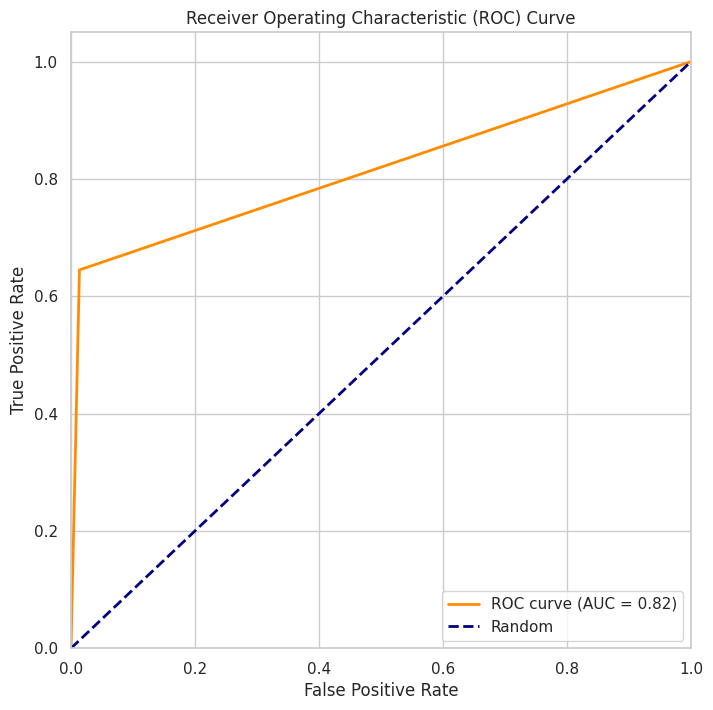

In [ ]:

# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score

fpr, tpr, _ = roc_curve(all_true_labels, all_predictions,drop_intermediate=False)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#hold out test

# Split the data into training and temporary (validation + test) sets
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Split the temporary set into validation and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=42, stratify=y_train_temp)

# Define the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Oversample the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Fit the Random Forest model on the oversampled training set
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation set
y_pred_val = rf_model.predict(X_val)

# Display the classification report for the validation set
report_val = classification_report(y_val, y_pred_val)
print("Validation Set Classification Report:\n", report_val)

# Make predictions on the held-out test set
y_pred_test = rf_model.predict(X_test)

# Display the classification report for the test set
report_test = classification_report(y_test, y_pred_test)
print("Test Set Classification Report:\n", report_test)


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      3354
           1       0.70      0.64      0.67       171

    accuracy                           0.97      3525
   macro avg       0.84      0.81      0.83      3525
weighted avg       0.97      0.97      0.97      3525

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      3355
           1       0.65      0.61      0.63       171

    accuracy                           0.97      3526
   macro avg       0.81      0.80      0.81      3526
weighted avg       0.96      0.97      0.96      3526



In [ ]:

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[3298   57]
 [  66  105]]


### ADABoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


# Assuming you have numpy arrays X and y

# Define the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Train the AdaBoost model on the resampled training set
    adaboost_classifier.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = adaboost_classifier.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)


Confusion Matrix:
 [[13440  3330]
 [  174   682]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.88     16770
           1       0.17      0.80      0.28       856

    accuracy                           0.80     17626
   macro avg       0.58      0.80      0.58     17626
weighted avg       0.95      0.80      0.86     17626



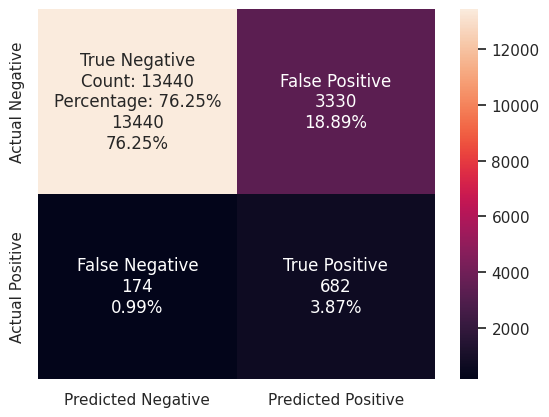

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

ROC-AUC Score: 0.7990800494875696


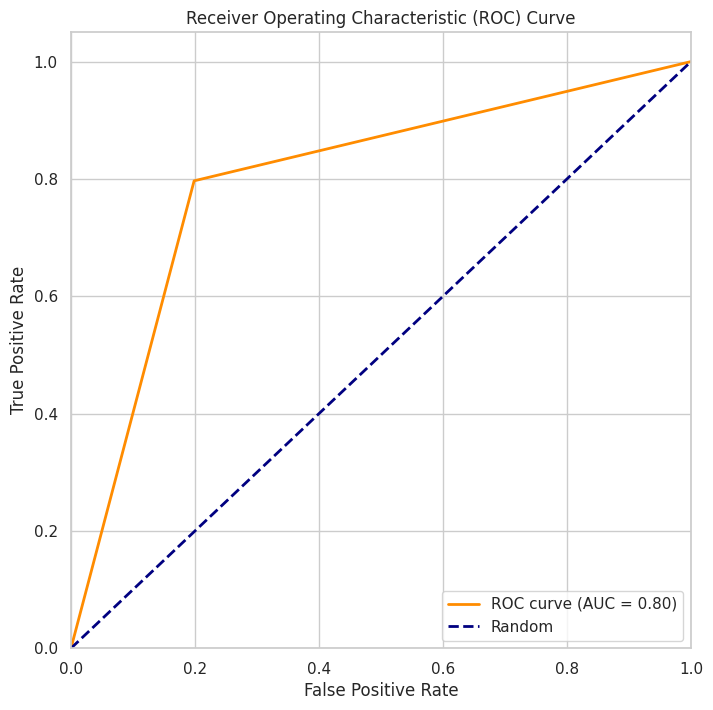

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score

fpr, tpr, _ = roc_curve(all_true_labels, all_predictions,drop_intermediate=False)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have numpy arrays X and y

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)

# Oversample the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Train the AdaBoost model on the resampled training set
adaboost_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_test = adaboost_classifier.predict(X_test)

# Display the classification report for the hold-out test
report_test = classification_report(y_test, y_pred_test)
print("Hold-out Test Classification Report:\n", report_test)

# Display the confusion matrix for the hold-out test
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Hold-out Test Confusion Matrix:\n", conf_matrix_test)


Hold-out Test Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.80      0.89      3348
           1       0.18      0.80      0.29       178

    accuracy                           0.80      3526
   macro avg       0.58      0.80      0.59      3526
weighted avg       0.95      0.80      0.86      3526

Hold-out Test Confusion Matrix:
 [[2686  662]
 [  35  143]]


### Gradient Boosting

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report

# Assuming you have a dataset (X, y) where X is your feature matrix and y is the target variable
# X and y should be numpy arrays or pandas DataFrames/Series

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variables to store overall predictions and true labels
all_predictions = []
all_true_labels = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Apply oversampling to the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Fit the XGBoost model on the resampled training set
    xgb_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Store predictions and true labels for later evaluation
    all_predictions.extend(y_pred)
    all_true_labels.extend(y_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(all_true_labels, all_predictions)
print("Confusion Matrix:\n", conf_matrix)

# Display the classification report
report = classification_report(all_true_labels, all_predictions)
print("Classification Report:\n", report)


Confusion Matrix:
 [[16015   755]
 [  226   630]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97     16770
           1       0.45      0.74      0.56       856

    accuracy                           0.94     17626
   macro avg       0.72      0.85      0.77     17626
weighted avg       0.96      0.94      0.95     17626



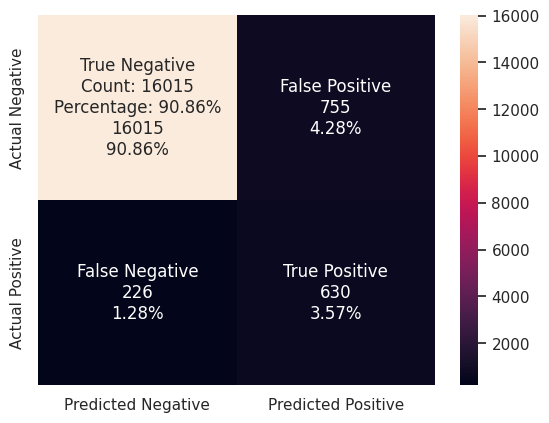

In [ ]:
# Calculate percentages for True Negative (TN)
tn_count = conf_matrix[0, 0]
total_samples = np.sum(conf_matrix)
tn_percentage = tn_count / total_samples

# Define custom tick labels
group_names = ['True Negative\nCount: {}\nPercentage: {:.2%}'.format(tn_count, tn_percentage),
               'False Positive', 'False Negative', 'True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in conf_matrix.flatten() / total_samples]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Create a seaborn heatmap with custom tick labels
sns.heatmap(conf_matrix, annot=labels, fmt='',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])



# Show the plot
plt.show()

ROC-AUC Score: 0.8454802189044746


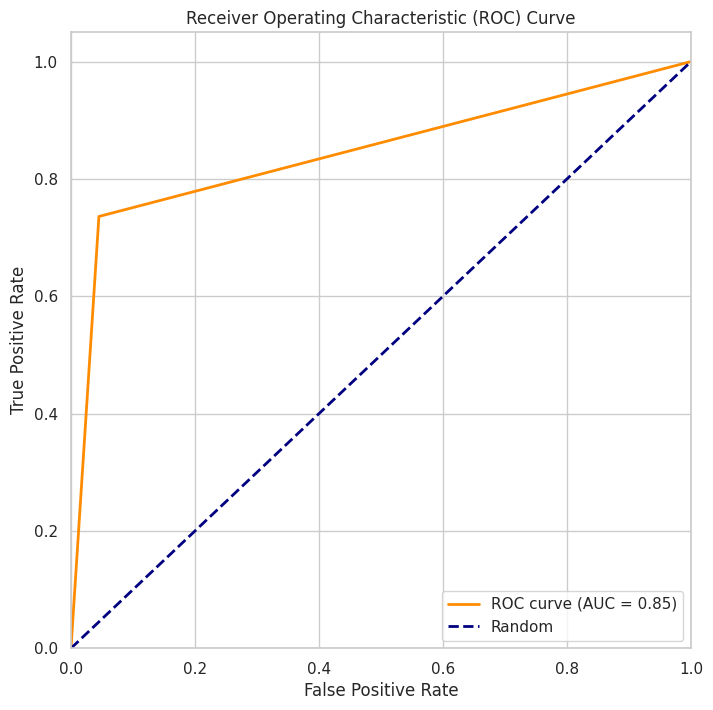

In [ ]:
# Calculate ROC-AUC score
roc_auc = roc_auc_score(all_true_labels, all_predictions)
print("ROC-AUC Score:", roc_auc)

from sklearn.metrics import roc_curve, auc

# Calculate ROC-AUC score

fpr, tpr, _ = roc_curve(all_true_labels, all_predictions,drop_intermediate=False)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:

from xgboost import XGBClassifier

# Assuming you have a dataset (X, y) where X is your feature matrix and y is the target variable
# X and y should be numpy arrays or pandas DataFrames/Series

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Oversample the training set
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation on the oversampled dataset with XGBoost
cv_scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=cv, scoring='accuracy')

# Display the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

# Fit the XGBoost model on the entire oversampled training set
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the held-out test set
y_pred_test = xgb_model.predict(X_test)

# Display the classification report for the test set
report_test = classification_report(y_test, y_pred_test)
print("Test Set Classification Report:\n", report_test)


Cross-Validation Scores: [0.97353709 0.97335073 0.97465524 0.97185986 0.97651882]
Mean Accuracy: 0.9739843458814761
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97      3355
           1       0.42      0.71      0.52       171

    accuracy                           0.94      3526
   macro avg       0.70      0.83      0.75      3526
weighted avg       0.96      0.94      0.95      3526



### Plotting Model Comparisons


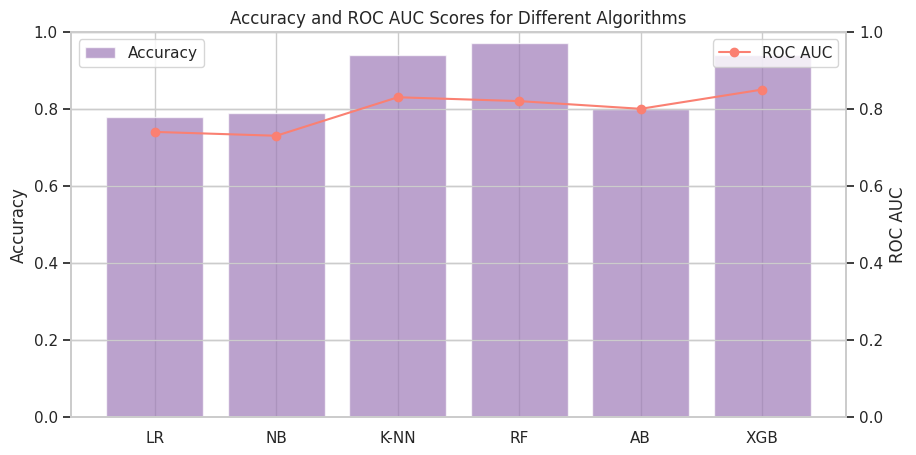

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have lists or arrays of algorithm names, accuracy scores, and ROC AUC scores
algorithm_names = ['LR', 'NB', 'K-NN','RF','AB','XGB']
accuracy_scores = [0.78, 0.79, 0.94,0.97,0.80,0.94]
roc_auc_scores = [0.74, 0.73, 0.83,0.82,0.80,0.85]

# Plotting accuracy scores
plt.figure(figsize=(10, 5))
plt.bar(algorithm_names, accuracy_scores, color='#9E7BB8', alpha=0.7, label='Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.legend()

# Creating a second y-axis for ROC AUC scores
plt.twinx()
plt.plot(algorithm_names, roc_auc_scores, color='salmon', marker='o', label='ROC AUC')
plt.ylabel('ROC AUC')
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.legend()

# Adding title and displaying the plot
plt.title('Accuracy and ROC AUC Scores for Different Algorithms')
plt.show()


### Feature Importance

In [ ]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# Assuming unbalanced_df is your DataFrame containing the features and the target variable
# Replace unbalanced_df with your actual DataFrame

# Extract the target variable 'fraudulent' as y
y = unbalanced_df['fraudulent'].values

# Extract the feature matrix X by dropping the 'fraudulent' column
X = unbalanced_df.drop(columns=['fraudulent']).values

# Define the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Define the oversampling strategy (RandomOverSampler in this case)
oversampler = RandomOverSampler(random_state=42)

# Define the cross-validation strategy (StratifiedKFold in this case)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize variable to store oversampled and cross-validated dataset
oversampled_cv_dataset = []

# Perform cross-validation with oversampling
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Oversample the training set within each fold
    X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

    # Fit the Random Forest classifier on the resampled training set
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Store oversampled and cross-validated dataset
    oversampled_fold = np.column_stack((X_train_resampled, y_train_resampled))
    oversampled_cv_dataset.append(oversampled_fold)

# Convert the oversampled_cv_dataset to a numpy array
oversampled_cv_dataset = np.vstack(oversampled_cv_dataset)

# Display the shape of the oversampled and cross-validated dataset
print("Shape of Oversampled and Cross-Validated Dataset:", oversampled_cv_dataset.shape)


Shape of Oversampled and Cross-Validated Dataset: (134160, 10)


In [ ]:
import pandas as pd

# Convert the oversampled_cv_dataset to a DataFrame with appropriate column names
columns = list(unbalanced_df.columns)  # Assuming unbalanced_df is your original DataFrame
columns[-1] = 'fraudulent'
columns[3] = 'employment_type'  # Update the last column name if needed
columns[4] = 'required_experience'  # Update the last column name if needed
columns[-5] = 'required_education'  # Update the last column name if needed
columns[-4] = 'industry'  # Update the last column name if needed
columns[-3] = 'function'  # Update the last column name if needed
columns[-2] = 'word_count'  # Update the last column name if needed

oversampled_cv_df = pd.DataFrame(oversampled_cv_dataset, columns=columns)



In [ ]:
oversampled_cv_df.head()

,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,word_count,fraudulent
0,0.0,1.0,0.0,0.6,0.571429,0.461538,0.633588,0.594595,0.142478,0.0
1,0.0,1.0,0.0,0.2,1.000000,0.461538,0.572519,0.189189,0.238259,0.0
2,0.0,1.0,0.0,0.4,0.857143,0.461538,0.633588,0.621622,0.149642,0.0
3,0.0,1.0,0.0,0.2,0.714286,0.076923,0.167939,0.864865,0.224993,0.0
4,0.0,1.0,1.0,0.2,0.714286,0.076923,0.389313,0.432432,0.162908,0.0


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming loaded_dataset is your oversampled and cross-validated DataFrame
X_oversampled = oversampled_cv_df.drop(columns=['fraudulent']).values
y_oversampled = oversampled_cv_df['fraudulent'].values

# Define the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the Random Forest classifier on the entire oversampled and cross-validated dataset
rf_model.fit(X_oversampled, y_oversampled)

# Extract feature names
feature_names = oversampled_cv_df.drop(columns=['fraudulent']).columns.tolist()

# Get Gini importance
gini_importance = rf_model.feature_importances_

# Plot Gini importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, gini_importance)
plt.xlabel('Gini Importance')
plt.title('Random Forest Gini Importance')
plt.show()

# Print Gini importance values for each feature
for feature, importance in zip(feature_names, gini_importance):
    print(f'{feature}: {importance}')


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assuming loaded_dataset is your oversampled and cross-validated DataFrame
X = oversampled_cv_df.drop(columns=['fraudulent']).values
y = oversampled_cv_df['fraudulent'].values

# Assuming 'X' is your feature matrix and 'y' is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Original feature importance scores
original_feature_importance = rf_model.feature_importances_

# Number of permutations
n_permutations = 1000

# Placeholder for permuted feature importance scores
permuted_importances = np.zeros((n_permutations, X_train.shape[1]))

# Permutation test
for i in range(n_permutations):
    # Permute the target variable
    y_permuted = np.random.permutation(y_train)

    # Train the model with permuted target
    rf_permuted = RandomForestClassifier(random_state=42)
    rf_permuted.fit(X_train, y_permuted)

    # Store permuted feature importance scores
    permuted_importances[i, :] = rf_permuted.feature_importances_

# Calculate p-values
p_values = np.mean(permuted_importances >= original_feature_importance, axis=0)

# Print p-values for each feature
print("Feature P-values:")
print(p_values)


Feature P-values:
[0.011 0.    0.    0.    0.109 0.    0.    0.141 1.   ]
